## Import

In [3]:
from matplotlib import pyplot as plt

import datetime
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


import tensorflow as tf

from keras.callbacks import History
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GRU, Bidirectional
from tensorflow.keras.optimizers import SGD, Adam
from sklearn import metrics
from sklearn.metrics import mean_squared_error, accuracy_score

import sklearn.metrics as metrics

sns.color_palette("viridis")

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("salesdaily.csv")
data

datum  M01AB   M01AE  N02BA  N02BE  N05B  N05C   R03   R06  Year  \
0      1/2/2014   0.00   3.670   3.40  32.40   7.0   0.0   0.0  2.00  2014   
1      1/3/2014   8.00   4.000   4.40  50.60  16.0   0.0  20.0  4.00  2014   
2      1/4/2014   2.00   1.000   6.50  61.85  10.0   0.0   9.0  1.00  2014   
3      1/5/2014   4.00   3.000   7.00  41.10   8.0   0.0   3.0  0.00  2014   
4      1/6/2014   5.00   1.000   4.50  21.70  16.0   2.0   6.0  2.00  2014   
...         ...    ...     ...    ...    ...   ...   ...   ...   ...   ...   
2101  10/4/2019   7.34   5.683   2.25  22.45  13.0   0.0   1.0  1.00  2019   
2102  10/5/2019   3.84   5.010   6.00  25.40   7.0   0.0   0.0  0.33  2019   
2103  10/6/2019   4.00  11.690   2.00  34.60   6.0   0.0   5.0  4.20  2019   
2104  10/7/2019   7.34   4.507   3.00  50.80   6.0   0.0  10.0  1.00  2019   
2105  10/8/2019   0.33   1.730   0.50  44.30  20.0   2.0   2.0  0.00  2019   

      Month  Hour Weekday Name  
0         1   248     Thursday  
1         1   276       Friday  
2         1   276     Saturday  
3         1   276       Sunday  
4         1   276       Monday  
...     ...   ...          ...  
2101     10   276       Friday  
2102     10   276     Saturday  
2103     10   276       Sunday  
2104     10   276       Monday  
2105     10   190      Tuesday  

[2106 rows x 13 columns]

In [5]:
data1 = pd.read_csv("salesweekly.csv")

In [6]:
data['datum'] = pd.to_datetime(data['datum'], infer_datetime_format=True)
data["Day"] = data["datum"].dt.day

In [7]:
data.index = data.pop('datum')
data

M01AB   M01AE  N02BA  N02BE  N05B  N05C   R03   R06  Year  Month  \
datum                                                                          
2014-01-02   0.00   3.670   3.40  32.40   7.0   0.0   0.0  2.00  2014      1   
2014-01-03   8.00   4.000   4.40  50.60  16.0   0.0  20.0  4.00  2014      1   
2014-01-04   2.00   1.000   6.50  61.85  10.0   0.0   9.0  1.00  2014      1   
2014-01-05   4.00   3.000   7.00  41.10   8.0   0.0   3.0  0.00  2014      1   
2014-01-06   5.00   1.000   4.50  21.70  16.0   2.0   6.0  2.00  2014      1   
...           ...     ...    ...    ...   ...   ...   ...   ...   ...    ...   
2019-10-04   7.34   5.683   2.25  22.45  13.0   0.0   1.0  1.00  2019     10   
2019-10-05   3.84   5.010   6.00  25.40   7.0   0.0   0.0  0.33  2019     10   
2019-10-06   4.00  11.690   2.00  34.60   6.0   0.0   5.0  4.20  2019     10   
2019-10-07   7.34   4.507   3.00  50.80   6.0   0.0  10.0  1.00  2019     10   
2019-10-08   0.33   1.730   0.50  44.30  20.0   2.0   2.0  0.00  2019     10   

            Hour Weekday Name  Day  
datum                               
2014-01-02   248     Thursday    2  
2014-01-03   276       Friday    3  
2014-01-04   276     Saturday    4  
2014-01-05   276       Sunday    5  
2014-01-06   276       Monday    6  
...          ...          ...  ...  
2019-10-04   276       Friday    4  
2019-10-05   276     Saturday    5  
2019-10-06   276       Sunday    6  
2019-10-07   276       Monday    7  
2019-10-08   190      Tuesday    8  

[2106 rows x 13 columns]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2106 entries, 2014-01-02 to 2019-10-08
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   M01AB         2106 non-null   float64
 1   M01AE         2106 non-null   float64
 2   N02BA         2106 non-null   float64
 3   N02BE         2106 non-null   float64
 4   N05B          2106 non-null   float64
 5   N05C          2106 non-null   float64
 6   R03           2106 non-null   float64
 7   R06           2106 non-null   float64
 8   Year          2106 non-null   int64  
 9   Month         2106 non-null   int64  
 10  Hour          2106 non-null   int64  
 11  Weekday Name  2106 non-null   object 
 12  Day           2106 non-null   int32  
dtypes: float64(8), int32(1), int64(3), object(1)
memory usage: 222.1+ KB


In [9]:
data.describe()

M01AB        M01AE        N02BA        N02BE         N05B  \
count  2106.000000  2106.000000  2106.000000  2106.000000  2106.000000   
mean      5.033683     3.895830     3.880441    29.917095     8.853627   
std       2.737579     2.133337     2.384010    15.590966     5.605605   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       3.000000     2.340000     2.000000    19.000000     5.000000   
50%       4.990000     3.670000     3.500000    26.900000     8.000000   
75%       6.670000     5.138000     5.200000    38.300000    12.000000   
max      17.340000    14.463000    16.000000   161.000000    54.833333   

              N05C          R03          R06         Year        Month  \
count  2106.000000  2106.000000  2106.000000  2106.000000  2106.000000   
mean      0.593522     5.512262     2.900198  2016.401235     6.344255   
std       1.092988     6.428736     2.415816     1.665060     3.386954   
min       0.000000     0.000000     0.000000  2014.000000     1.000000   
25%       0.000000     1.000000     1.000000  2015.000000     3.000000   
50%       0.000000     4.000000     2.000000  2016.000000     6.000000   
75%       1.000000     8.000000     4.000000  2018.000000     9.000000   
max       9.000000    45.000000    15.000000  2019.000000    12.000000   

              Hour          Day  
count  2106.000000  2106.000000  
mean    275.945869    15.686135  
std       1.970547     8.806215  
min     190.000000     1.000000  
25%     276.000000     8.000000  
50%     276.000000    16.000000  
75%     276.000000    23.000000  
max     276.000000    31.000000

In [10]:
nan_count = data.isnull().sum().sort_values()
print(nan_count)

M01AB           0
M01AE           0
N02BA           0
N02BE           0
N05B            0
N05C            0
R03             0
R06             0
Year            0
Month           0
Hour            0
Weekday Name    0
Day             0
dtype: int64


In [11]:
data.columns

Index(['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06',
       'Year', 'Month', 'Hour', 'Weekday Name', 'Day'],
      dtype='object')

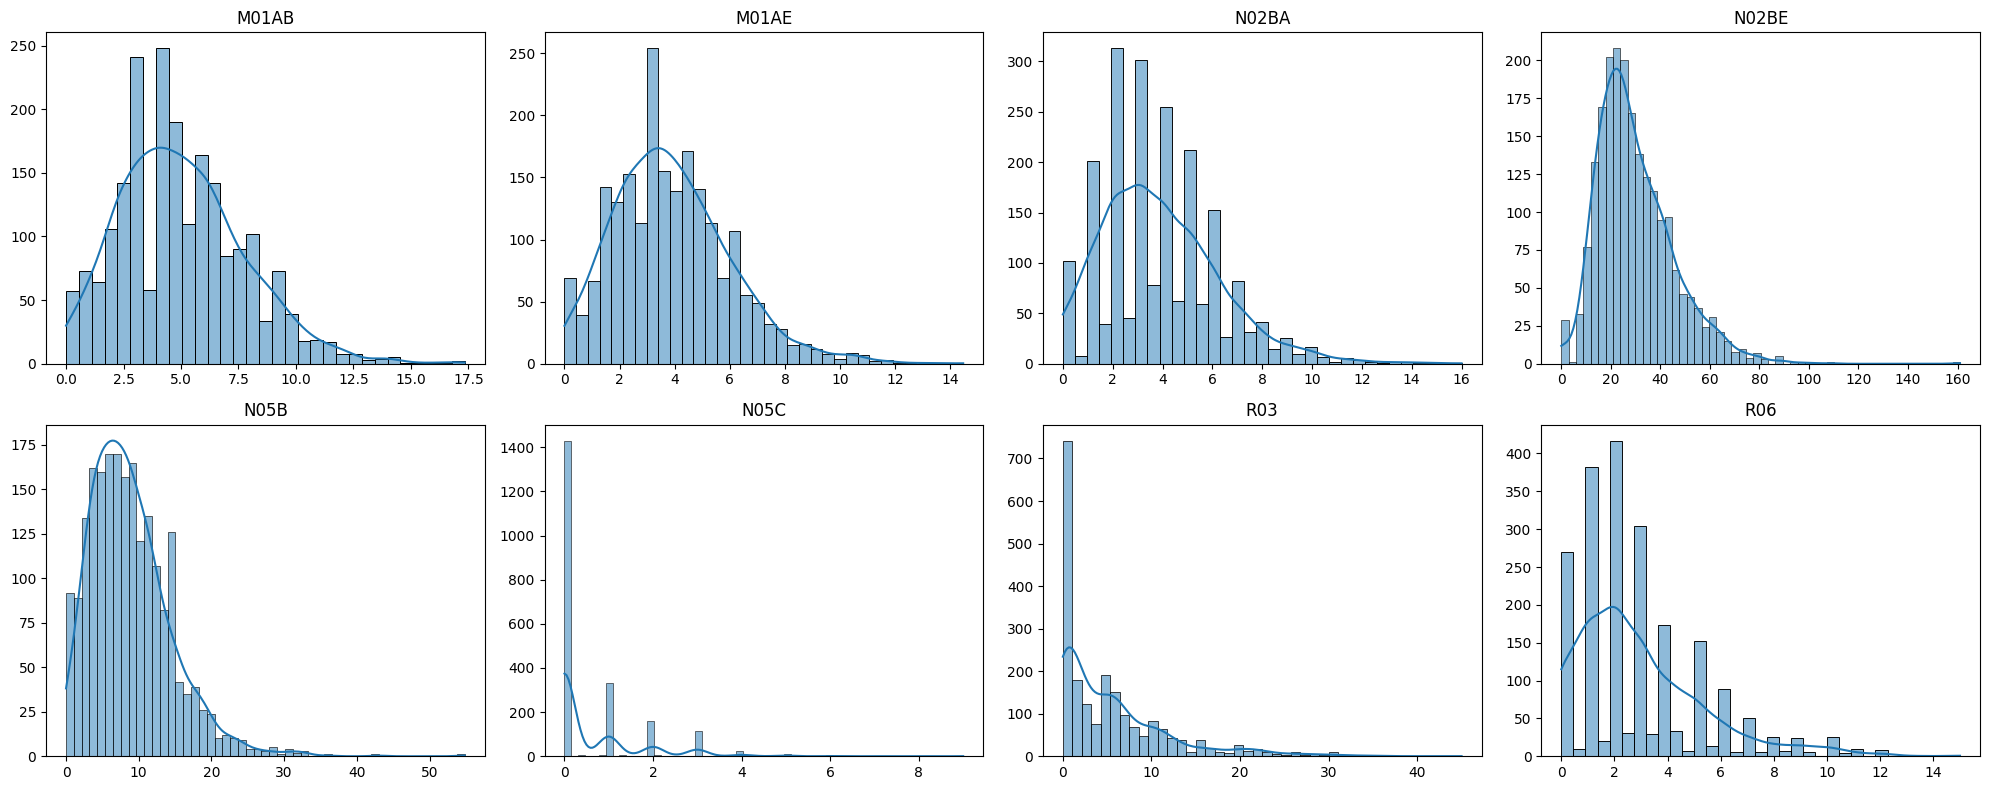

In [12]:
columns = ['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03','R06']

fig, axes = plt.subplots(2, 4, figsize=(20, 8))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    sns.histplot(x=column_name, data=data, ax=axes[i], kde=True)
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    
plt.tight_layout()
plt.show()

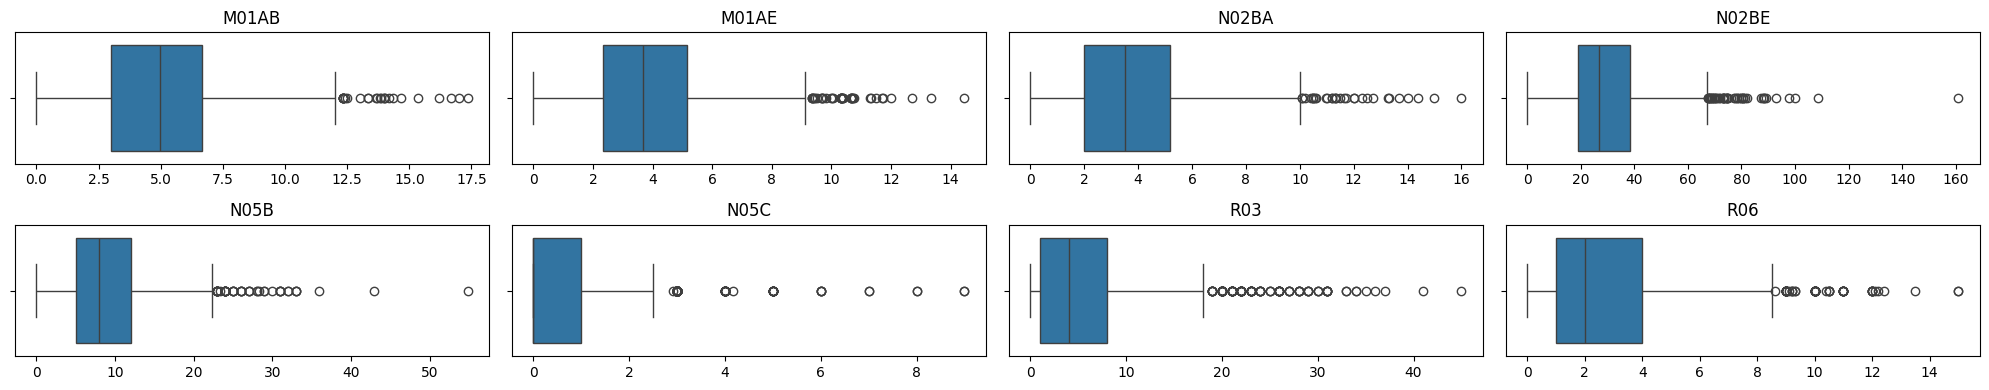

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(20, 4))
axes = axes.flatten()
for i, column_name in enumerate(columns):
    sns.boxplot(x=column_name, data=data, ax=axes[i])
    axes[i].set_title(column_name)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

In [14]:
def plot(data, columns, x):
    fig, axes = plt.subplots(4, 2, figsize=(20, 8))
    axes = axes.flatten()
    for i, column_name in enumerate(columns):
        sns.lineplot(x=x, y=column_name, data=data, ax=axes[i])
        axes[i].set_title(column_name)
        axes[i].set_xlabel('')
        axes[i].set_ylabel('')
    plt.tight_layout()
    plt.show()

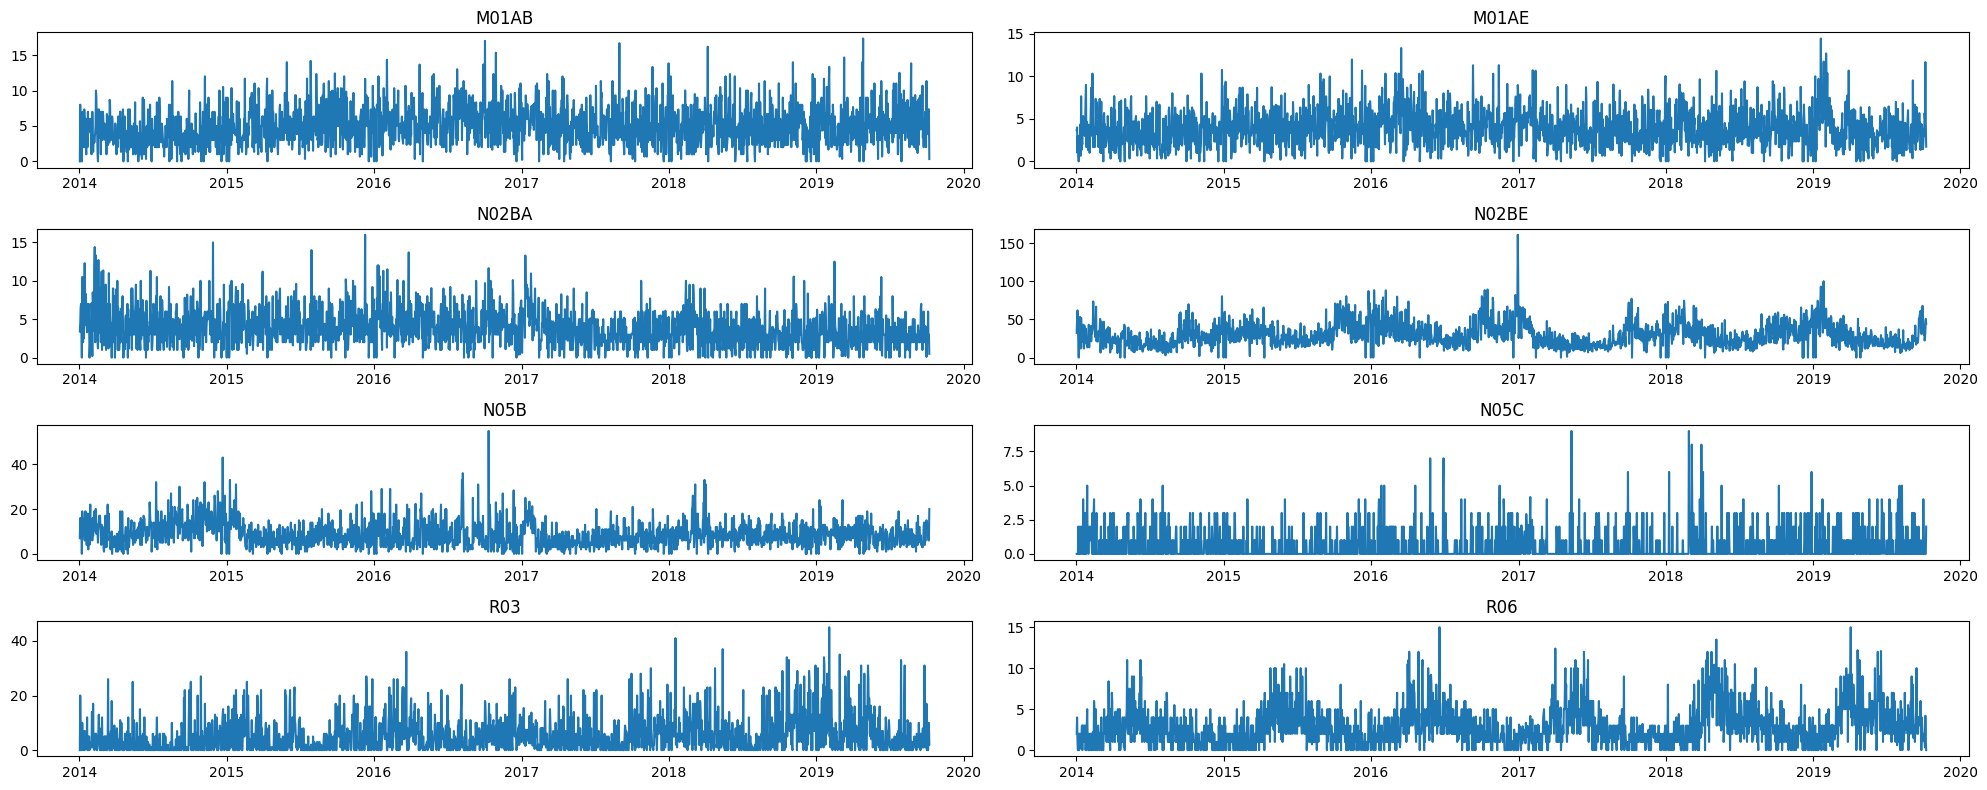

In [15]:
plot(data, columns, 'datum')

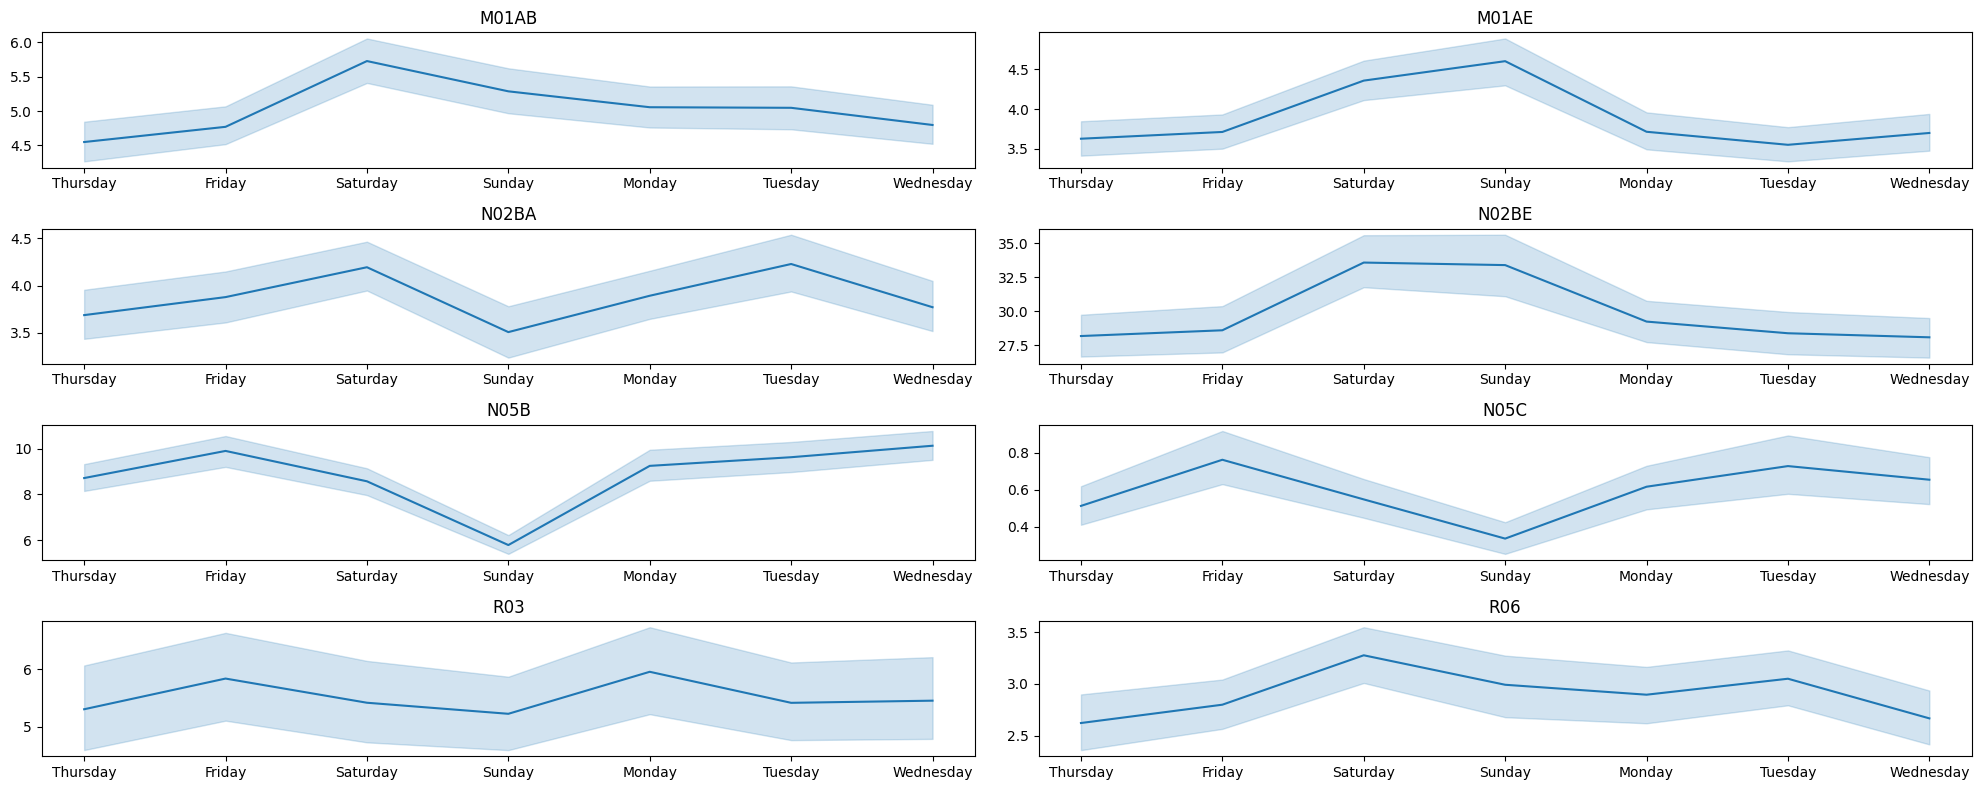

In [16]:
plot(data, columns, 'Weekday Name')

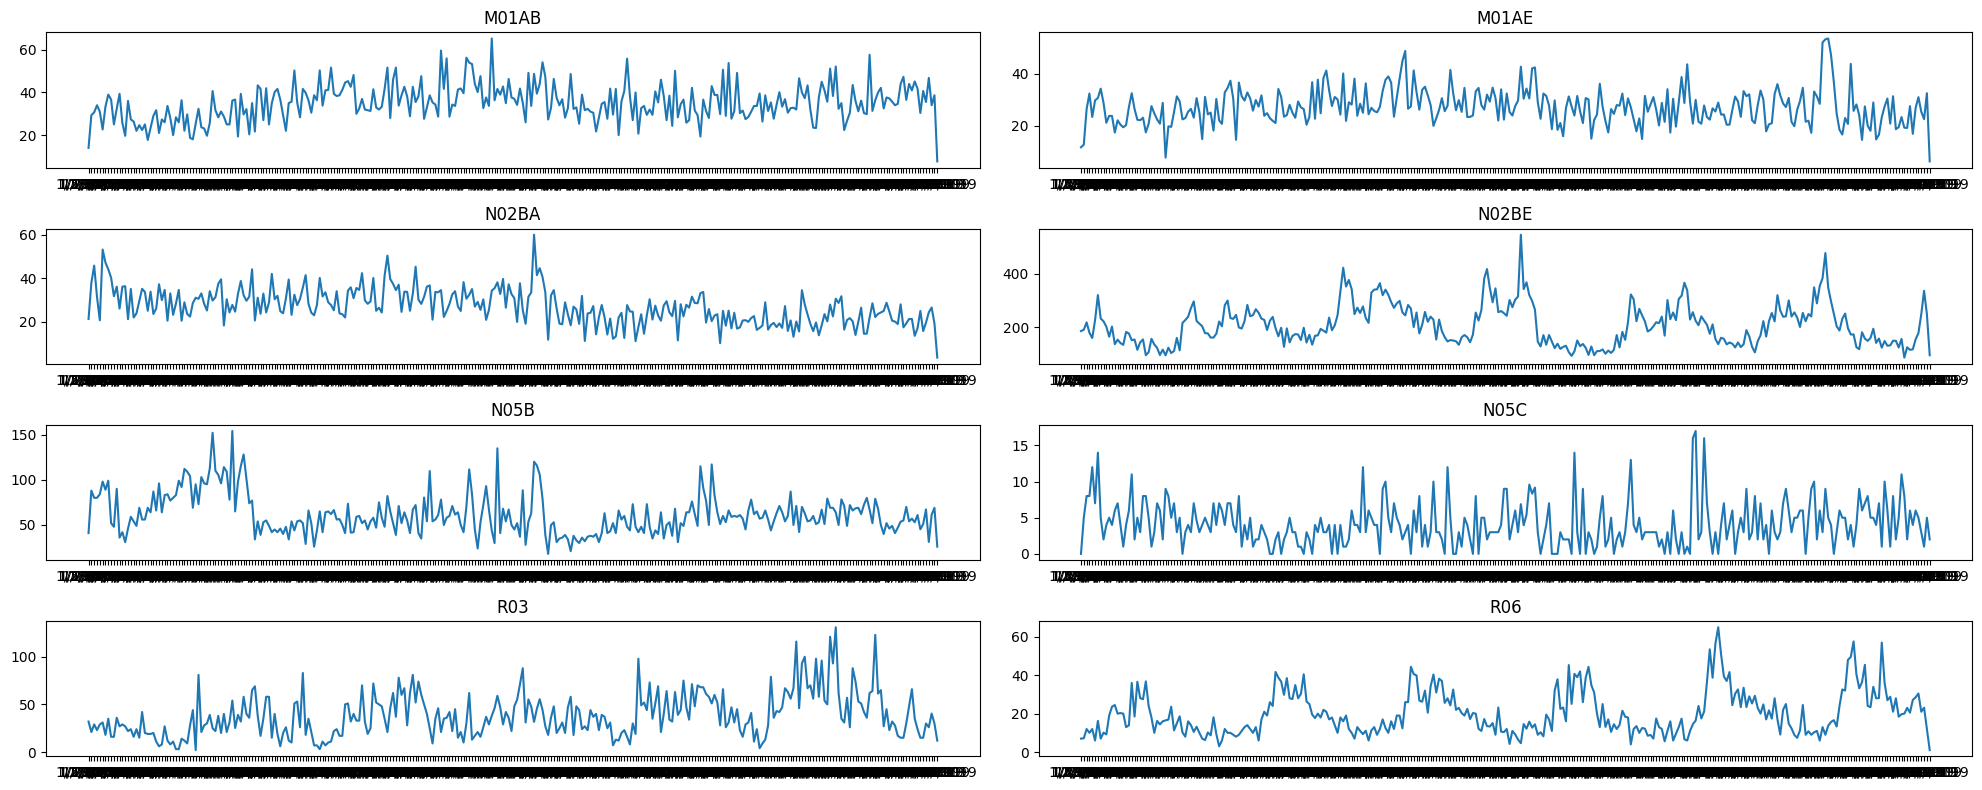

In [17]:
plot(data1, columns, 'datum')

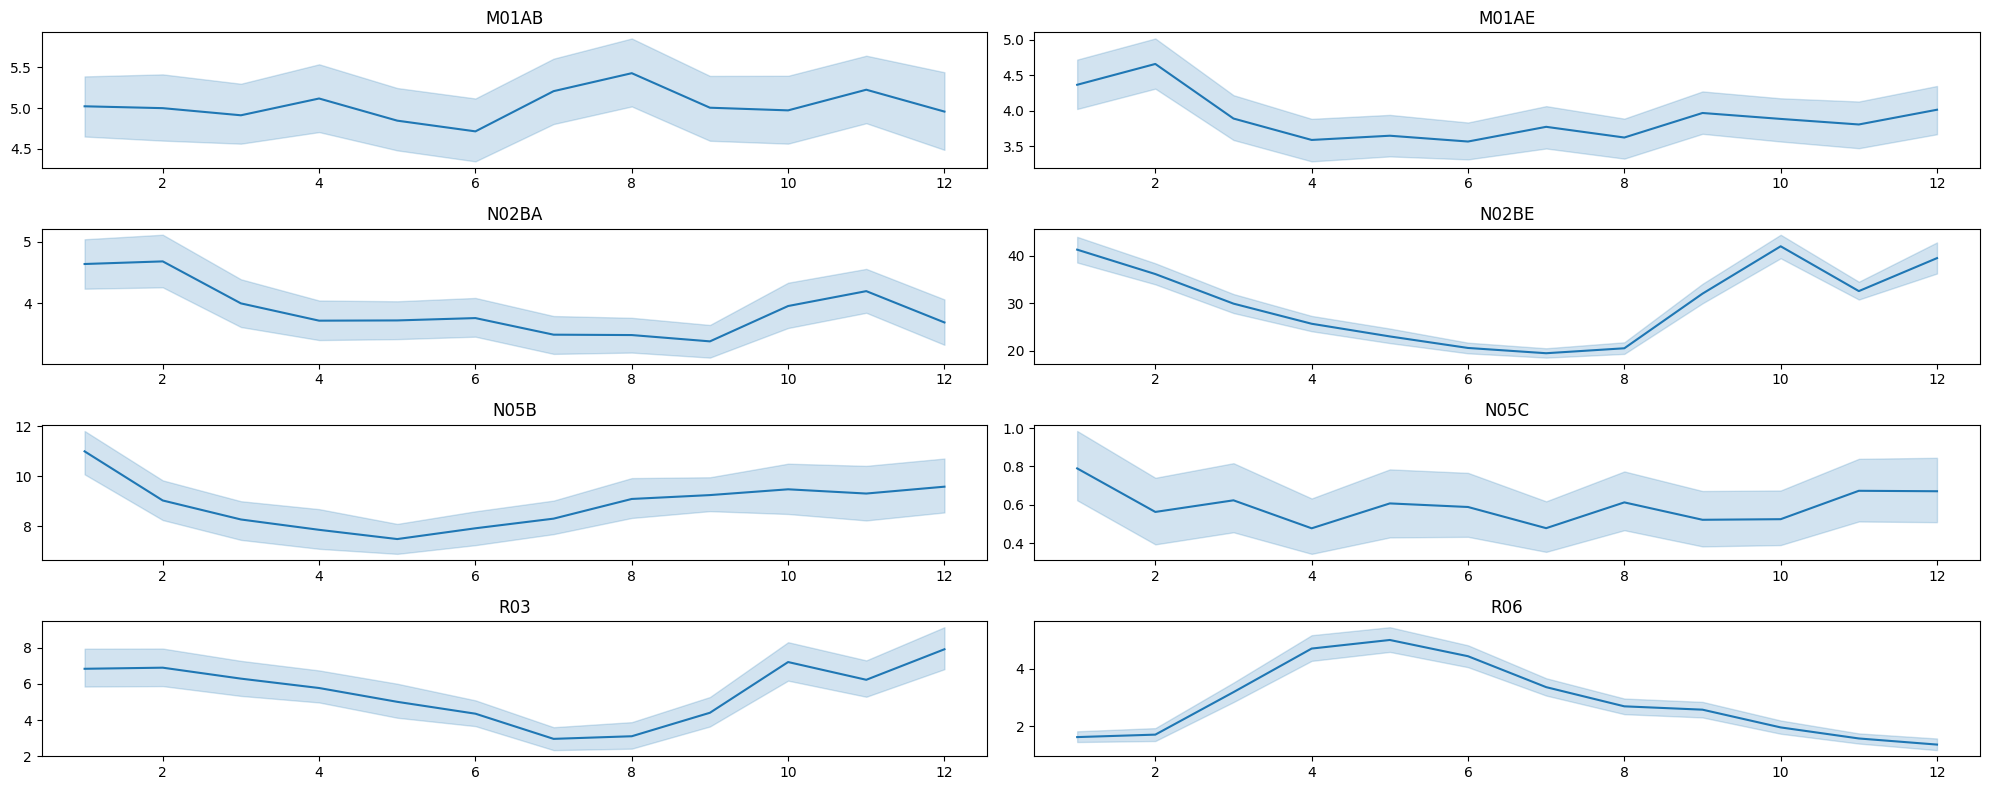

In [18]:
plot(data, columns, 'Month')

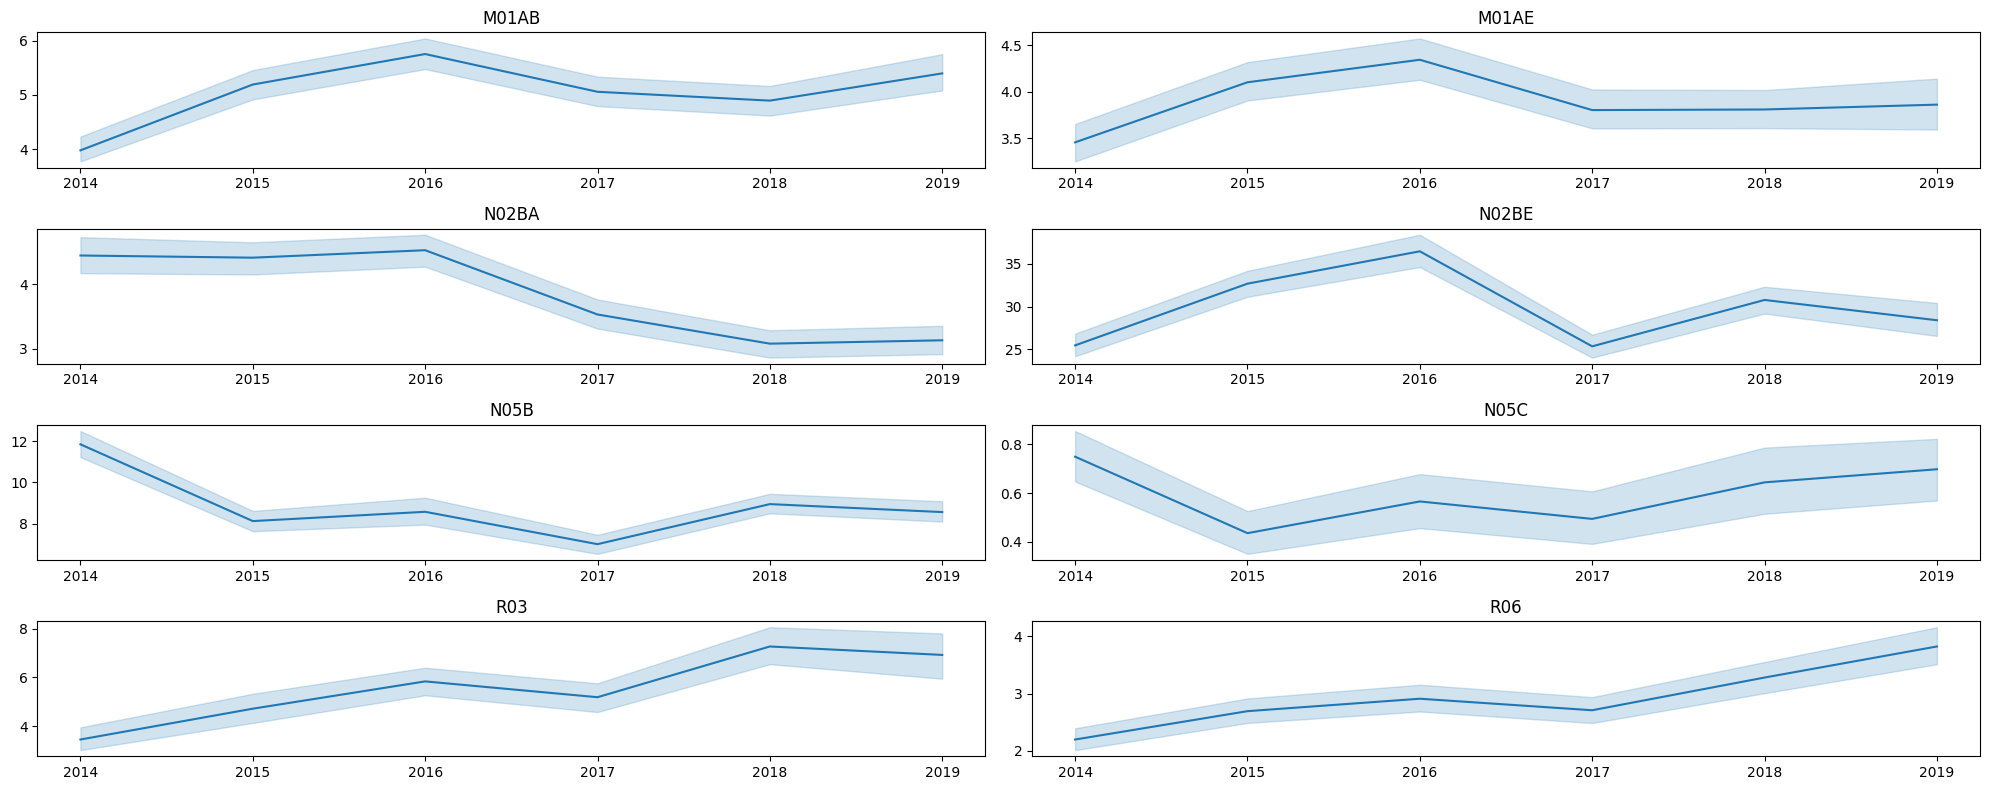

In [19]:
plot(data, columns, 'Year')

In [20]:
data['Weekday Name'].value_counts()

Weekday Name
Thursday     301
Friday       301
Saturday     301
Sunday       301
Monday       301
Tuesday      301
Wednesday    300
Name: count, dtype: int64

In [21]:
scale_mapper = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
    }

data['Weekday Name'] = data['Weekday Name'].replace(scale_mapper)


In [22]:
data["Season"] =    np.where(data["Month"].isin([3,4,5]),"Spring",
                    np.where(data["Month"].isin([6,7,8]), "Summer",
                    np.where(data["Month"].isin ([9,10,11]),"Fall",
                    np.where(data["Month"].isin ([12,1,2]),"Winter","None"))))

In [23]:
data.head()

M01AB  M01AE  N02BA  N02BE  N05B  N05C   R03  R06  Year  Month  \
datum                                                                        
2014-01-02    0.0   3.67    3.4  32.40   7.0   0.0   0.0  2.0  2014      1   
2014-01-03    8.0   4.00    4.4  50.60  16.0   0.0  20.0  4.0  2014      1   
2014-01-04    2.0   1.00    6.5  61.85  10.0   0.0   9.0  1.0  2014      1   
2014-01-05    4.0   3.00    7.0  41.10   8.0   0.0   3.0  0.0  2014      1   
2014-01-06    5.0   1.00    4.5  21.70  16.0   2.0   6.0  2.0  2014      1   

            Hour  Weekday Name  Day  Season  
datum                                        
2014-01-02   248             3    2  Winter  
2014-01-03   276             4    3  Winter  
2014-01-04   276             5    4  Winter  
2014-01-05   276             6    5  Winter  
2014-01-06   276             0    6  Winter

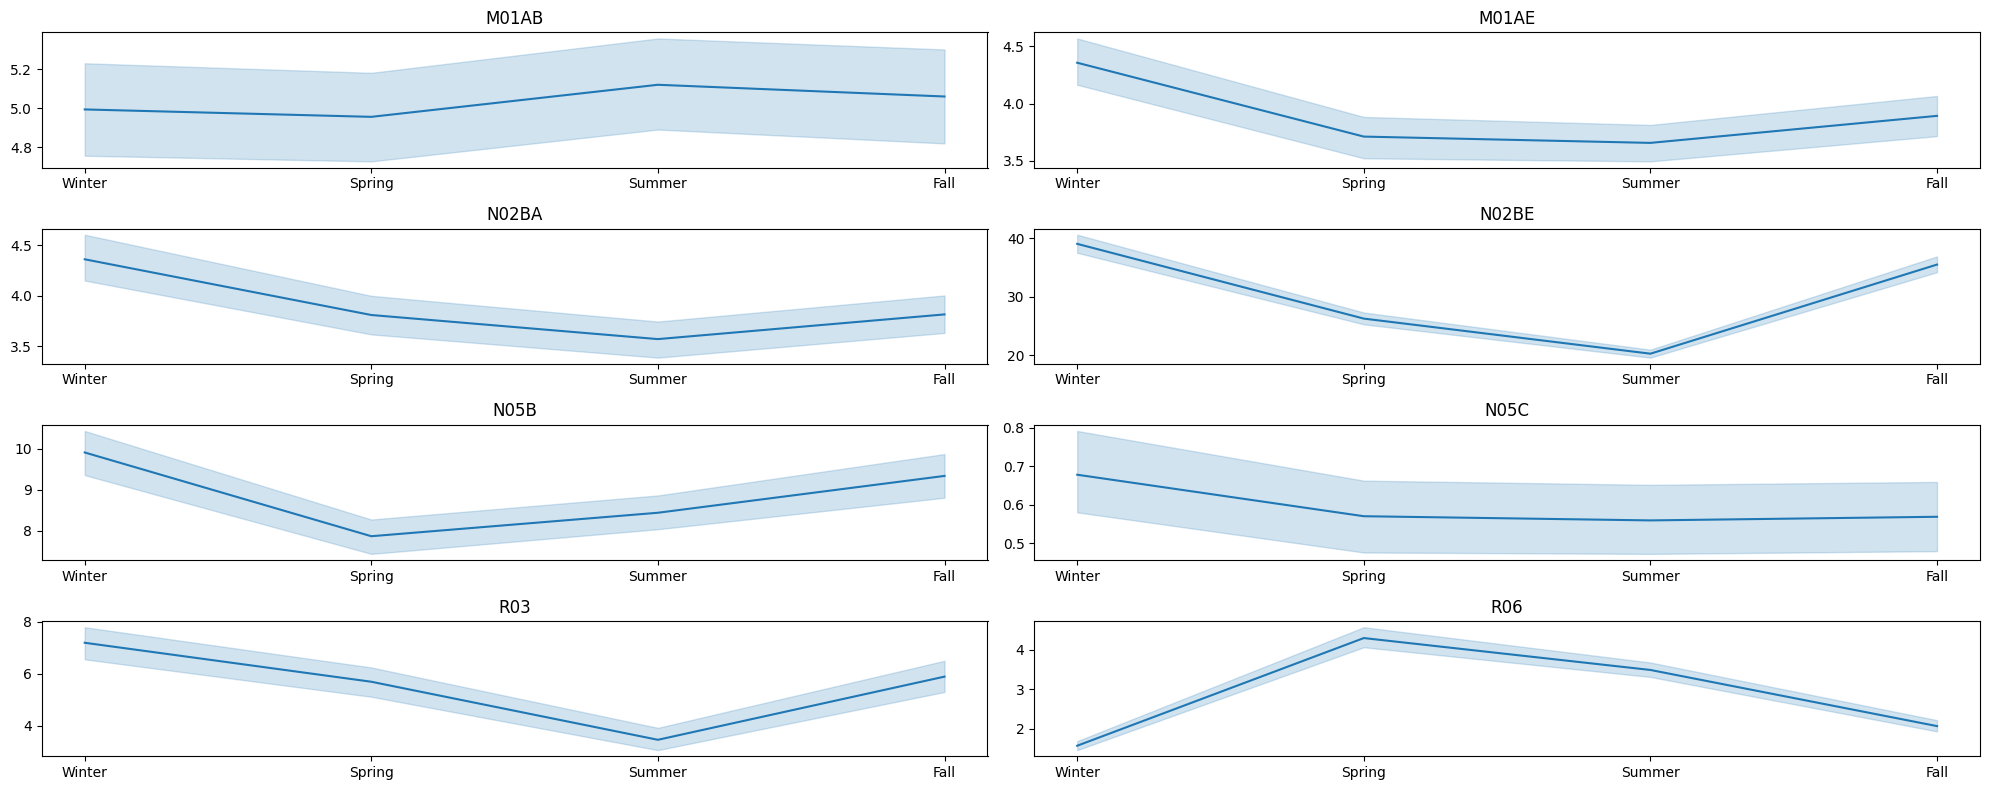

In [24]:
plot(data, columns, 'Season')

In [25]:
data = pd.get_dummies(data=data, columns=['Season'])


In [26]:
data = data.drop(columns=['Hour'])

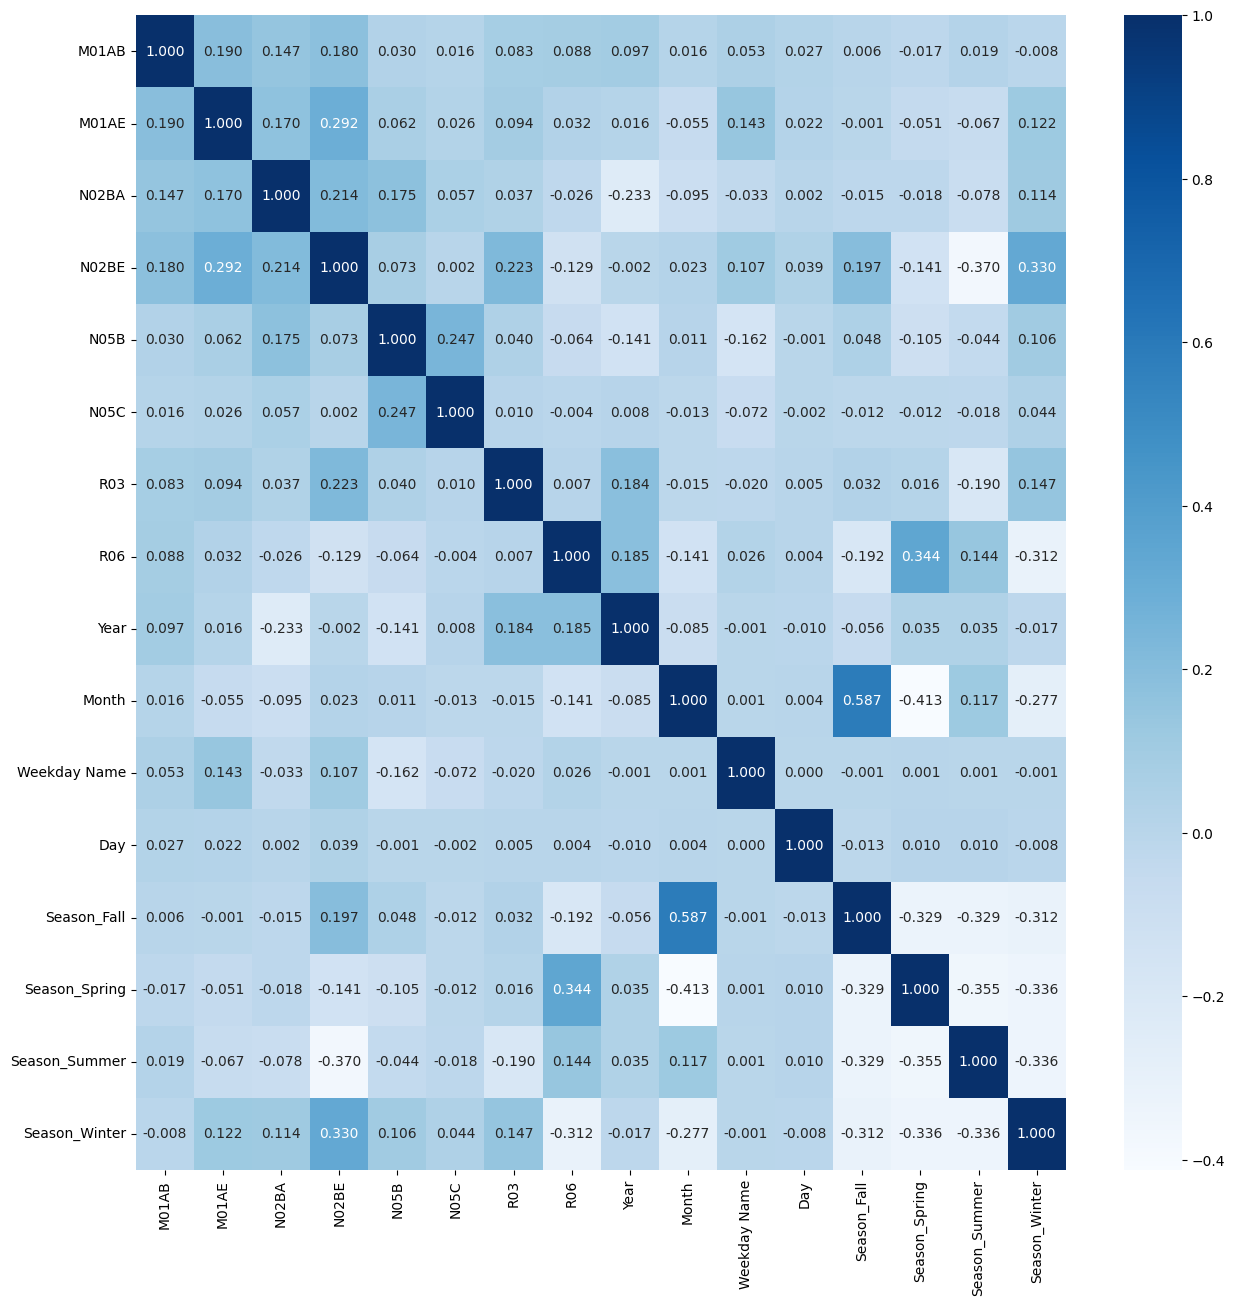

In [27]:
df_corr = data.corr()
plt.figure(figsize = (15,15))
sns.heatmap(data=df_corr, annot=True,cmap='Blues',fmt='.3f')
plt.show()

Podela podataka na train, val i test skup (70%, 20%, 10%).

In [69]:
data = data.drop(columns=['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', ])

In [87]:
data = data.drop(columns=['Year', 'Month', 'Weekday Name', 'Day', 'Season_Fall', 'Season_Spring',
       'Season_Summer', 'Season_Winter'])

In [88]:
data

R06
datum           
2014-01-02  2.00
2014-01-03  4.00
2014-01-04  1.00
2014-01-05  0.00
2014-01-06  2.00
...          ...
2019-10-04  1.00
2019-10-05  0.33
2019-10-06  4.20
2019-10-07  1.00
2019-10-08  0.00

[2106 rows x 1 columns]

In [89]:
column_indices = {name: i for i, name in enumerate(data.columns)}

n = len(data)
train_df = data[0:int(n*0.7)]
val_df = data[int(n*0.7):int(n*0.9)]
test_df = data[int(n*0.9):]

print("Train size : ", train_df.shape, "\n"
      "Validation size : ", val_df.shape, "\n"
      "Test Size : ", test_df.shape)

train_df

Train size :  (1474, 1) 
Validation size :  (421, 1) 
Test Size :  (211, 1)


R06
datum          
2014-01-02  2.0
2014-01-03  4.0
2014-01-04  1.0
2014-01-05  0.0
2014-01-06  2.0
...         ...
2018-01-10  2.0
2018-01-11  0.0
2018-01-12  0.0
2018-01-13  1.0
2018-01-14  1.0

[1474 rows x 1 columns]

In [90]:
train_df.columns

Index(['R06'], dtype='object')

Normalizacija podataka

In [91]:
scaler = MinMaxScaler()

col = [ 'R06',
       ]

train_df[col] = scaler.fit_transform(train_df[col])
val_df[col] = scaler.transform(val_df[col])
test_df[col] = scaler.transform(test_df[col])


In [92]:
target = ['R06']

def split_into_windows(data, window_size, step_size):
    X, Y = [], []
    for i in range(0, len(data) - window_size, step_size):
        X.append(data.iloc[i:i+window_size])
        Y.append(data.iloc[i+window_size][target])
    return np.array(X), np.array(Y)

In [93]:
X_train, Y_train = split_into_windows(train_df.astype(np.float32), 11, 1)
X_val, Y_val = split_into_windows(val_df.astype(np.float32), 11, 1)
X_test, Y_test = split_into_windows(test_df.astype(np.float32), 11, 1)

In [94]:
print("Train size : ", X_train.shape, Y_train.shape,"\n",
      "Val size : ", X_val.shape, Y_val.shape,"\n",
      "Test Size : ", X_test.shape, Y_train.shape)

Train size :  (1463, 11, 1) (1463, 1) 
 Val size :  (410, 11, 1) (410, 1) 
 Test Size :  (200, 11, 1) (1463, 1)


pomocne funkcije

In [95]:
results = pd.DataFrame(columns=['Model', 'mean abs', 'R2', 'mean sqrd'])


In [96]:

def print_result(model, model_name, X_test, y_test, end=-1):

    y_pred = model.predict(X_test)

    mean_abs = metrics.mean_absolute_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)
    mean_sqrd = metrics.mean_squared_error(y_test, y_pred)

    results.loc[len(results)] = [model_name, mean_abs, r2, mean_sqrd]

    fig, axs = plt.subplots(4, 2, figsize=(12, 12)) 

    # for k in range(0,8):
    #     i = k // 2 
    #     j = k % 2   
        
    #     axs[i, j].plot(y_test[:, k], label='True')   
    #     axs[i, j].plot(y_pred[:, k], label='Predicted') 
    #     axs[i, j].set_xlabel(data.columns[k])  
    #     axs[i, j].legend()

    plt.plot(y_test, label='True')   
    plt.plot(y_pred, label='Predicted') 
    plt.tight_layout()  
    plt.show()


    display(results)



In [97]:

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True)


Modeli


In [98]:
history = History()
def plotloss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title("Model's Training & Validation loss across epochs")
    plt.ylabel('Loss')
    plt.xlabel('Epochs')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

# SimpleRNN

Epoch 1/11
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.0550 - mean_absolute_error: 0.1875 - root_mean_squared_error: 0.2276 - val_loss: 0.0250 - val_mean_absolute_error: 0.1156 - val_root_mean_squared_error: 0.1581
Epoch 2/11
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0198 - mean_absolute_error: 0.1075 - root_mean_squared_error: 0.1406 - val_loss: 0.0251 - val_mean_absolute_error: 0.1146 - val_root_mean_squared_error: 0.1586
Epoch 3/11
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0197 - mean_absolute_error: 0.1070 - root_mean_squared_error: 0.1404 - val_loss: 0.0250 - val_mean_absolute_error: 0.1136 - val_root_mean_squared_error: 0.1581
Epoch 4/11
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0199 - mean_absolute_error: 0.1068 - root_mean_squared_error: 0.1412 - val_loss: 0.0242 - val_mean_absolute_error: 0.1116 - val_root_mean_squared_error: 0.1555
Epoch 5/11
1463/1463 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0192 - mean_absolute_error: 0.1048 - ro

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 11, 50)         │         3,350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 11, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 11, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 11, 50)         │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           408 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 37,818 (147.73 KB)

 Trainable params: 18,908 (73.86 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 18,910 (73.87 KB)

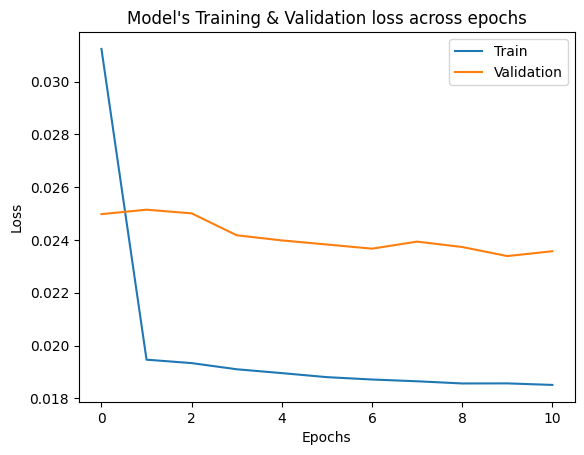

In [38]:

model = Sequential()
# adding RNN layers and dropout regularization 
model.add(SimpleRNN(units = 50, activation = "relu",input_shape=(X_train.shape[1], X_train.shape[2]),return_sequences = True))
model.add(Dropout(0.2))
model.add(SimpleRNN(units = 50,  activation = "relu", return_sequences = True))
model.add(SimpleRNN(units = 50, activation = "relu", return_sequences = True))
model.add(SimpleRNN(units = 50))
# adding the output layer
model.add(Dense(units = len(target), activation='sigmoid')) 
# compiling RNN
model.compile(optimizer = SGD(learning_rate=0.001,decay=1e-6,  momentum=0.9, nesterov=True), metrics = ["mean_absolute_error", tf.metrics.RootMeanSquaredError()],loss = "mean_squared_error")

history = model.fit(X_train,Y_train, 
                    validation_data=(X_val, Y_val), 
                    epochs = 11, batch_size = 1,
                    callbacks=[ history]
                    )
model.summary()
plotloss(history)


In [39]:
model.evaluate(X_test,Y_test)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0227 - mean_absolute_error: 0.1070 - root_mean_squared_error: 0.1503  


[0.020596789196133614, 0.10246815532445908, 0.14301995933055878]

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step


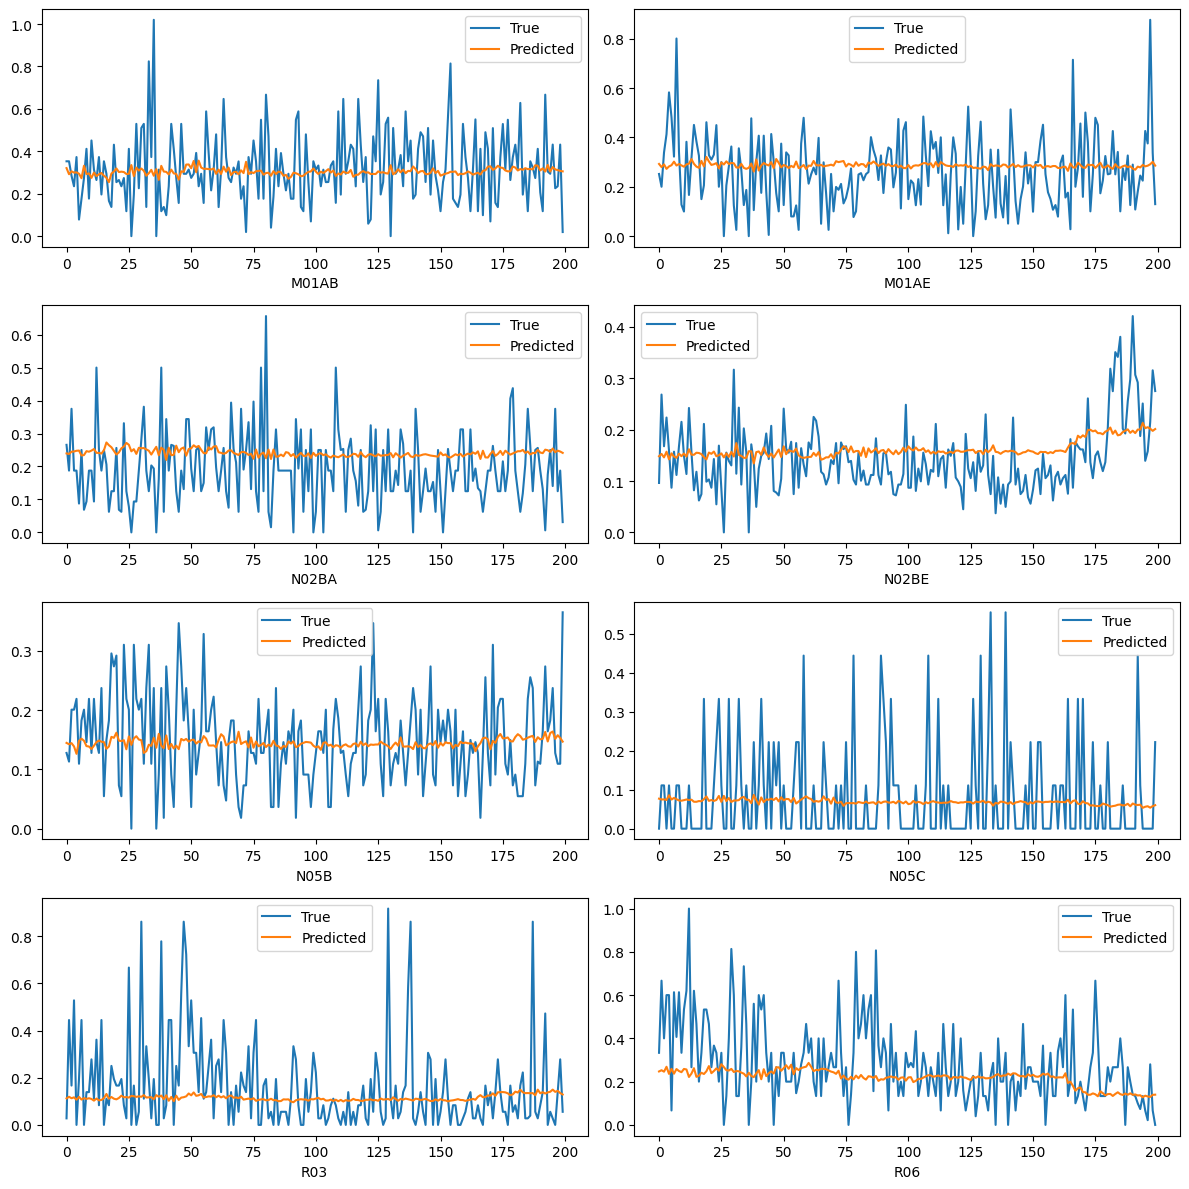

Model  mean abs        R2  \
0  SimpleRNN 4 units 50, SGD 0.001, LOSS mean_squ...  0.102468 -0.035813   

   mean sqrd  
0   0.020455

In [40]:
print_result(model, 'SimpleRNN 4 units 50, SGD 0.001, LOSS mean_squared_error', X_test, Y_test, 200)

# LSTM

LSTM 50 50 D25, 8

In [99]:
X_train.shape

(1463, 11, 1)

In [100]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)
                    ])


model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'],
             )



In [101]:

model.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=50, callbacks=[history, early_stopping])


Epoch 1/50


46/46 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.0246 - mean_absolute_error: 0.1138 - val_loss: 0.0212 - val_mean_absolute_error: 0.1152
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0186 - mean_absolute_error: 0.1032 - val_loss: 0.0212 - val_mean_absolute_error: 0.1100
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0174 - mean_absolute_error: 0.1004 - val_loss: 0.0210 - val_mean_absolute_error: 0.1100
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0160 - mean_absolute_error: 0.0969 - val_loss: 0.0204 - val_mean_absolute_error: 0.1105
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0172 - mean_absolute_error: 0.0986 - val_loss: 0.0208 - val_mean_absolute_error: 0.1102
Epoch 6/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0195 - mean_absolute_error: 0.1059 - val_loss: 0.0205 - val_mean_absolute_error: 0.1099
Epoch 7/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0168 - mean_absolute_error: 0.0973 - val_loss: 0.0230 - val_me

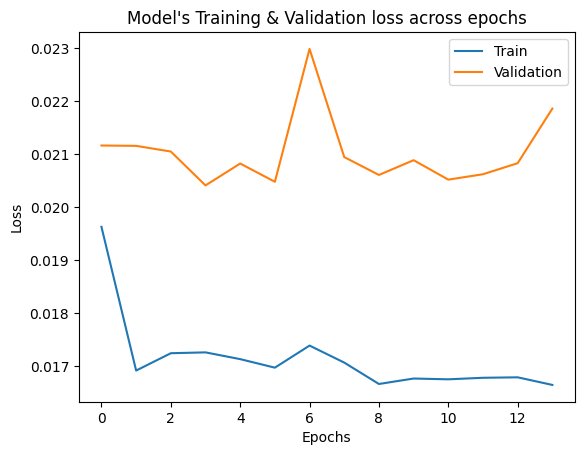

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


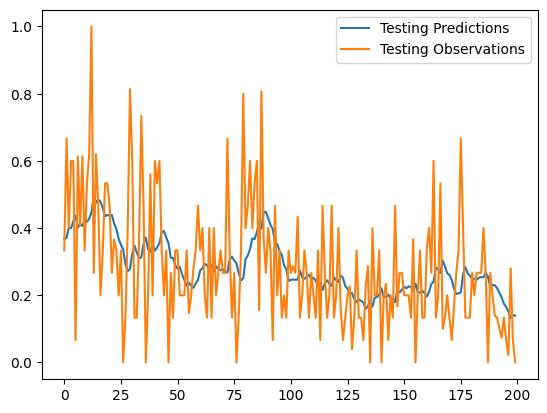

In [102]:

plotloss(history)

test_predictions = model.predict(X_test).flatten()

plt.plot(test_predictions)
plt.plot( Y_test)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [64]:
regressorLSTM = tf.keras.Sequential()
regressorLSTM.add(LSTM(50, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
regressorLSTM.add(LSTM(50, return_sequences = False))
regressorLSTM.add(Dense(25, activation="relu"))
regressorLSTM.add(Dense(len(target),activation="relu"))
regressorLSTM.compile(optimizer = Adam(learning_rate=0.001),loss = 'mean_squared_error',metrics = ["mean_absolute_error",'mean_squared_error'])
regressorLSTM.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=50,batch_size=32, callbacks=[history, early_stopping])
regressorLSTM.summary()


Epoch 1/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - loss: 0.0361 - mean_absolute_error: 0.1384 - mean_squared_error: 0.0361 - val_loss: 0.0357 - val_mean_absolute_error: 0.1362 - val_mean_squared_error: 0.0358
Epoch 2/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0262 - mean_absolute_error: 0.1177 - mean_squared_error: 0.0262 - val_loss: 0.0350 - val_mean_absolute_error: 0.1323 - val_mean_squared_error: 0.0351
Epoch 3/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0258 - mean_absolute_error: 0.1162 - mean_squared_error: 0.0258 - val_loss: 0.0354 - val_mean_absolute_error: 0.1346 - val_mean_squared_error: 0.0355
Epoch 4/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0251 - mean_absolute_error: 0.1142 - mean_squared_error: 0.0251 - val_loss: 0.0349 - val_mean_absolute_error: 0.1328 - val_mean_squared_error: 0.0350
Epoch 5/50
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0260 - mean_absolute_error: 0.1157 - mean_squared_error: 0.0260 - val_loss: 0.0350 - val_mean_ab

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 11, 50)         │        13,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 8)              │           208 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105,251 (411.14 KB)

 Trainable params: 35,083 (137.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 70,168 (274.10 KB)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0443 - mean_absolute_error: 0.1475 - mean_squared_error: 0.0443 


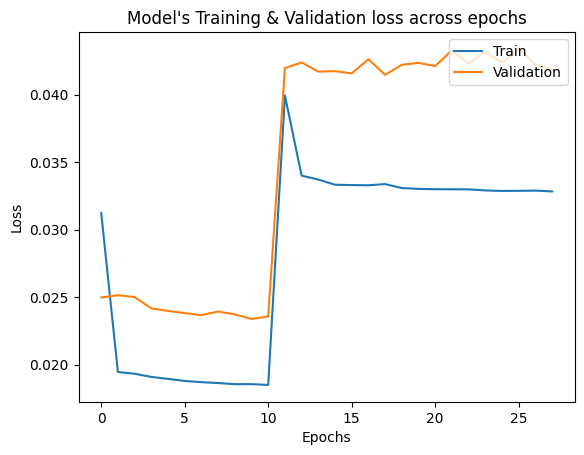

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


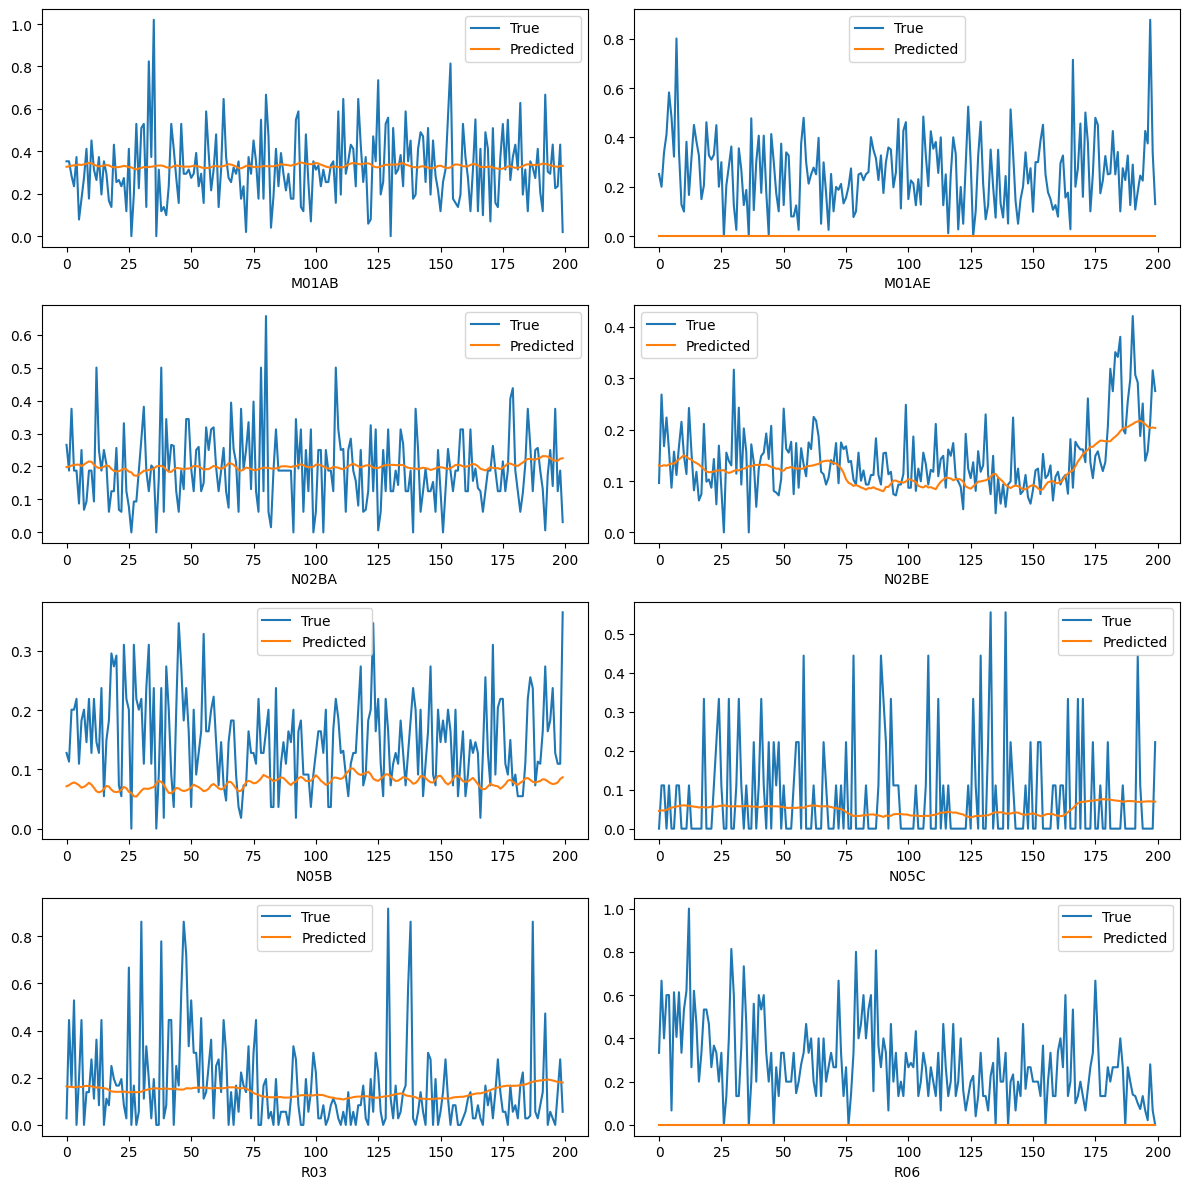

Model  mean abs        R2  \
0  SimpleRNN 4 units 50, SGD 0.001, LOSS mean_squ...  0.102468 -0.035813   
1  LSTM 2 units 50, Dense 2 25,1,  Adam 0.001, LO...  0.138927 -0.815100   

   mean sqrd  
0   0.020455  
1   0.038807

In [42]:

result = regressorLSTM.evaluate(X_test,Y_test)
plotloss(history)
print_result(regressorLSTM, 'LSTM 2 units 50, Dense 2 25,1,  Adam 0.001, LOSS mean_squared_error', X_test, Y_test)


LSTM 32,16 D8

In [43]:

regressorLSTM = tf.keras.Sequential()
regressorLSTM.add(LSTM(32, return_sequences = True,  input_shape = (X_train.shape[1],X_train.shape[2])))
regressorLSTM.add(LSTM(16, return_sequences = False))

regressorLSTM.add(Dense(len(target),activation="relu"))
regressorLSTM.compile(optimizer = Adam(learning_rate=0.001),loss = 'mean_squared_error',metrics = ["mean_absolute_error",'mean_squared_error'])
regressorLSTM.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=64, callbacks=[history, early_stopping])
regressorLSTM.summary()


Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0393 - mean_absolute_error: 0.1494 - mean_squared_error: 0.0393 - val_loss: 0.0350 - val_mean_absolute_error: 0.1347 - val_mean_squared_error: 0.0354
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0267 - mean_absolute_error: 0.1210 - mean_squared_error: 0.0267 - val_loss: 0.0309 - val_mean_absolute_error: 0.1244 - val_mean_squared_error: 0.0315
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0218 - mean_absolute_error: 0.1078 - mean_squared_error: 0.0218 - val_loss: 0.0246 - val_mean_absolute_error: 0.1112 - val_mean_squared_error: 0.0245
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0186 - mean_absolute_error: 0.1022 - mean_squared_error: 0.0186 - val_loss: 0.0235 - val_mean_absolute_error: 0.1105 - val_mean_squared_error: 0.0235
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0191 - mean_absolute_error: 0.1043 - mean_squared_error: 0.0191 - val_loss: 0.0235 - val_mean_

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 11, 32)         │         6,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │           136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,634 (111.86 KB)

 Trainable params: 9,544 (37.28 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,090 (74.57 KB)

1/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0231 - mean_absolute_error: 0.1073 - mean_squared_error: 0.0231

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0212 - mean_absolute_error: 0.1030 - mean_squared_error: 0.0212


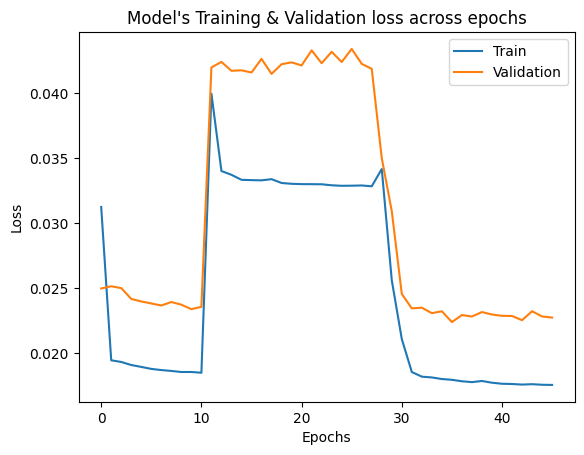

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step


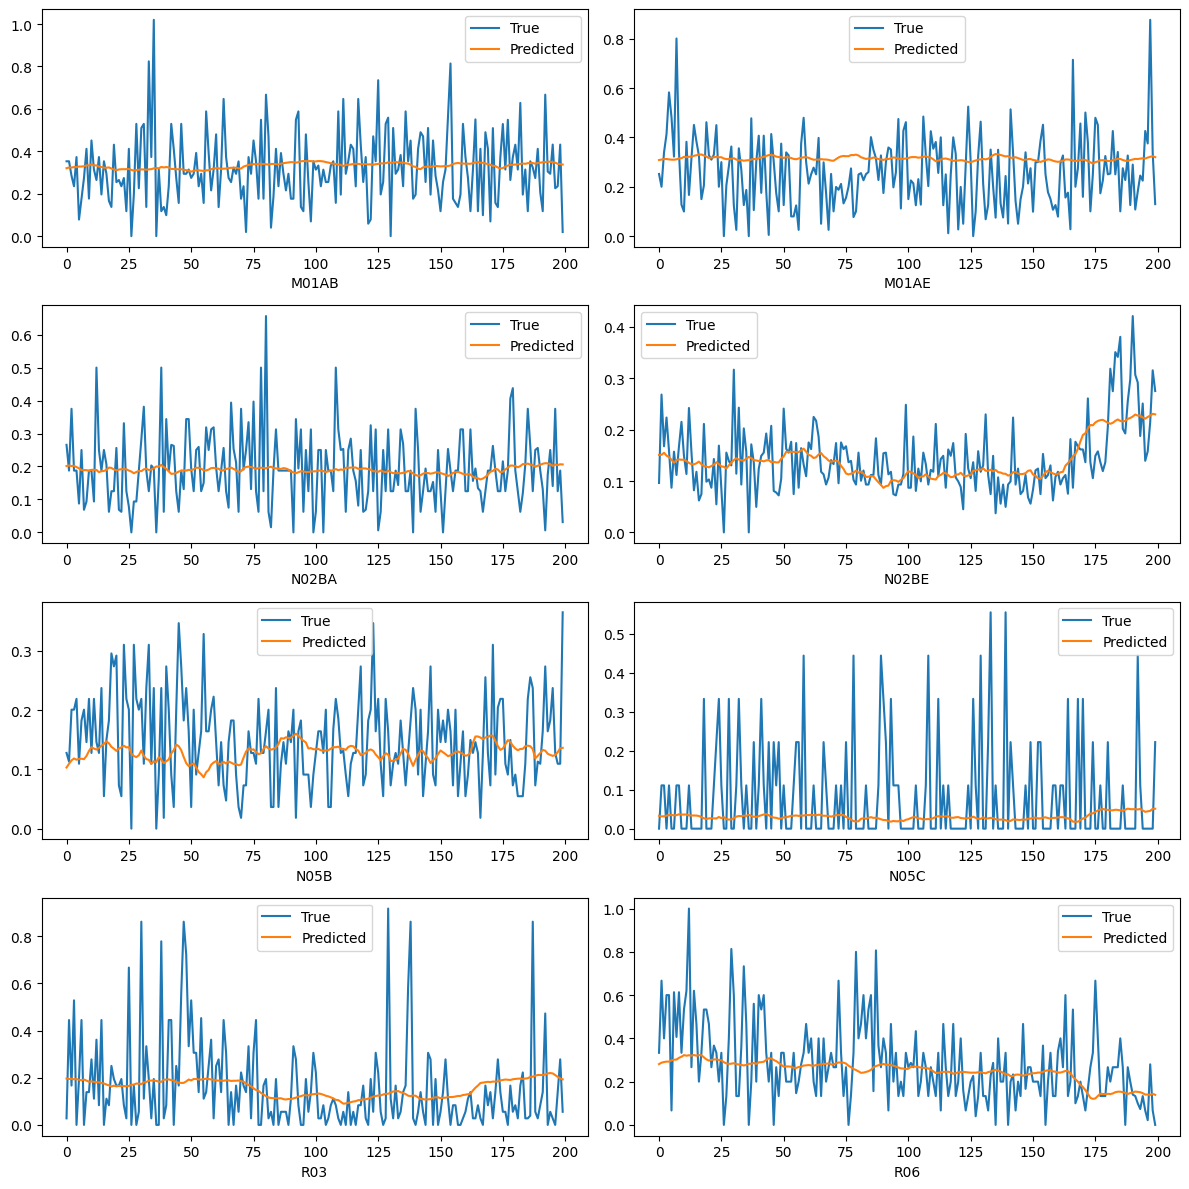

Model  mean abs        R2  \
0  SimpleRNN 4 units 50, SGD 0.001, LOSS mean_squ...  0.102468 -0.035813   
1  LSTM 2 units 50, Dense 2 25,1,  Adam 0.001, LO...  0.138927 -0.815100   
2  LSTM 32, 16, ,  Adam 0.001, LOSS mean_squared_...  0.099693 -0.005375   

   mean sqrd  
0   0.020455  
1   0.038807  
2   0.019757

In [44]:
result = regressorLSTM.evaluate(X_test,Y_test)
plotloss(history)
print_result(regressorLSTM, 'LSTM 32, 16, ,  Adam 0.001, LOSS mean_squared_error', X_test, Y_test)


LSTM 50 D0.2, LSTM 3x50

In [45]:
regressorLSTM = Sequential()
regressorLSTM.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorLSTM.add(Dropout(0.2))
regressorLSTM.add(LSTM(units=50,return_sequences=True,activation='tanh'))
regressorLSTM.add(LSTM(units=50,return_sequences=True, activation='tanh'))
regressorLSTM.add(LSTM(units=50,activation='tanh'))
regressorLSTM.add(Dense(units=len(target),activation='relu'))
regressorLSTM.compile(optimizer=Adam(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorLSTM.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=2042, callbacks=[history, early_stopping])
regressorLSTM.summary()

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - loss: 0.0618 - mean_absolute_error: 0.1922 - val_loss: 0.0642 - val_mean_absolute_error: 0.1951
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step - loss: 0.0562 - mean_absolute_error: 0.1817 - val_loss: 0.0560 - val_mean_absolute_error: 0.1800
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - loss: 0.0490 - mean_absolute_error: 0.1680 - val_loss: 0.0471 - val_mean_absolute_error: 0.1618
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - loss: 0.0409 - mean_absolute_error: 0.1515 - val_loss: 0.0383 - val_mean_absolute_error: 0.1429
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step - loss: 0.0328 - mean_absolute_error: 0.1341 - val_loss: 0.0309 - val_mean_absolute_error: 0.1278
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - loss: 0.0259 - mean_absolute_error: 0.1197 - val_loss: 0.0271 - val_mean_absolute_error: 0.1230
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - loss: 0.0225 - mean_absolute_error: 0.1151 - val_loss: 0

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 11, 50)         │        13,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 11, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 11, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 11, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           408 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 223,226 (871.98 KB)

 Trainable params: 74,408 (290.66 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 148,818 (581.32 KB)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0610 - mean_absolute_error: 0.1913 


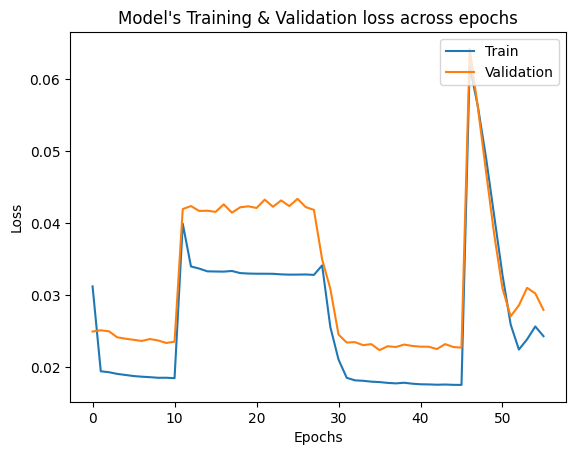

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step


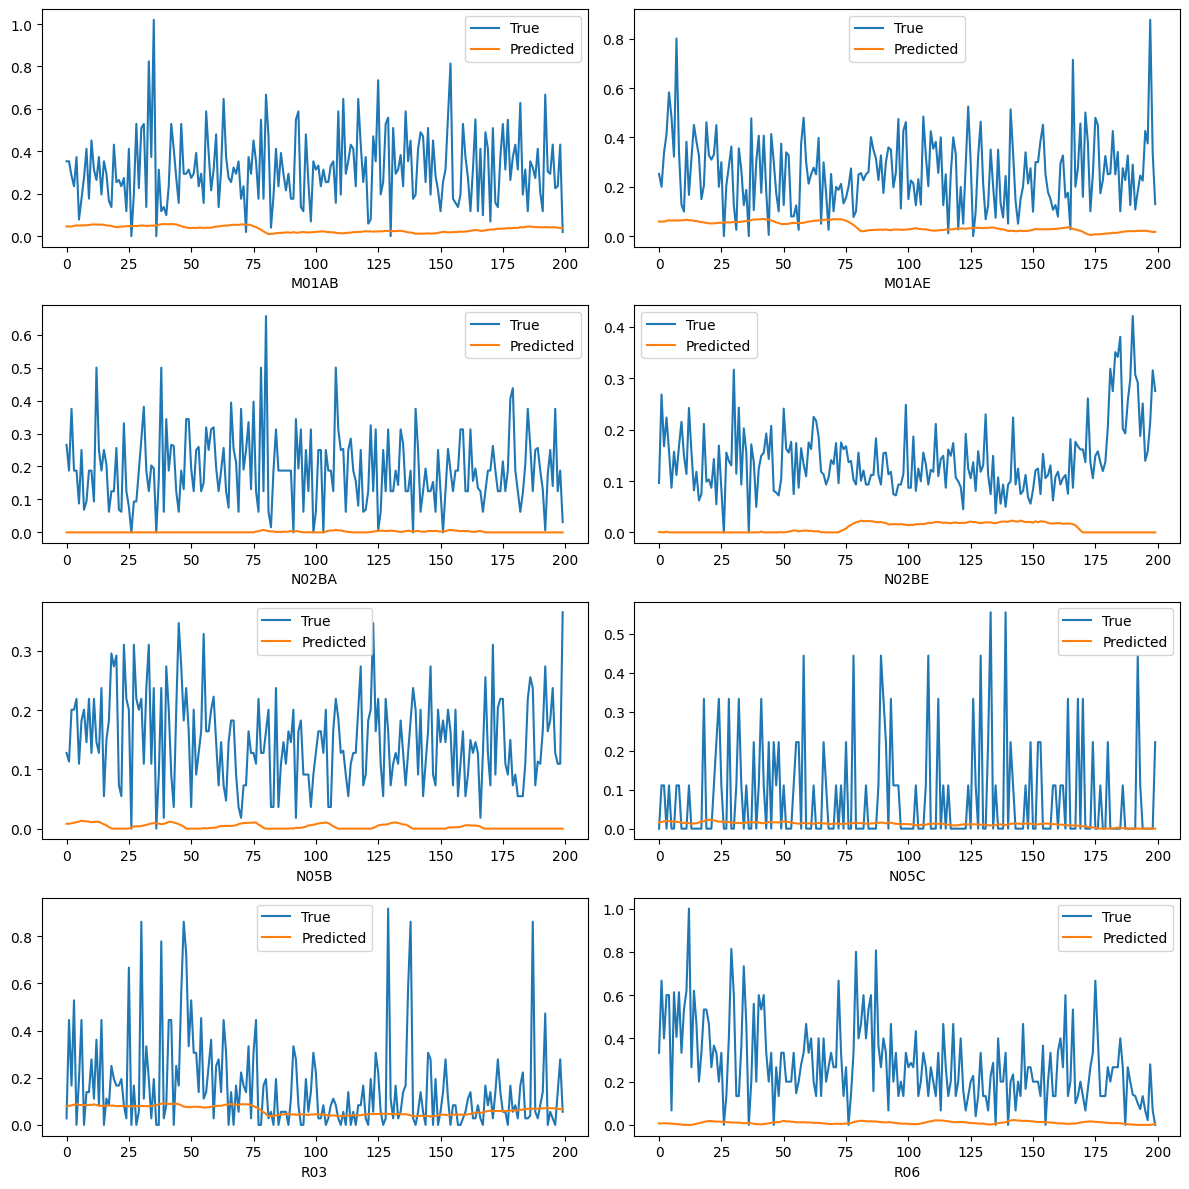

Model  mean abs        R2  \
0  SimpleRNN 4 units 50, SGD 0.001, LOSS mean_squ...  0.102468 -0.035813   
1  LSTM 2 units 50, Dense 2 25,1,  Adam 0.001, LO...  0.138927 -0.815100   
2  LSTM 32, 16, ,  Adam 0.001, LOSS mean_squared_...  0.099693 -0.005375   
3  4 LSTM 50, Drop 0.2,  Adam 0.001, LOSS mean_sq...  0.183893 -2.375937   

   mean sqrd  
0   0.020455  
1   0.038807  
2   0.019757  
3   0.056685

In [46]:
result = regressorLSTM.evaluate(X_test,Y_test)
plotloss(history)
print_result(regressorLSTM, '4 LSTM 50, Drop 0.2,  Adam 0.001, LOSS mean_squared_error', X_test, Y_test)


# GRU

In [47]:
regressorGRU = Sequential()
regressorGRU.add(GRU(units=50,return_sequences=True,input_shape=(X_train.shape[1],X_train.shape[2]),activation='tanh'))
regressorGRU.add(Dropout(0.2)) #to prevent overfitting
regressorGRU.add(GRU(units=50,return_sequences=True,activation='tanh'))
regressorGRU.add(GRU(units=50,return_sequences=True, activation='tanh'))
regressorGRU.add(GRU(units=50,activation='tanh'))
regressorGRU.add(Dense(units=len(target),activation='relu'))
regressorGRU.compile(optimizer=Adam(learning_rate=0.001),  metrics = ["mean_absolute_error"],loss = "mean_squared_error")
regressorGRU.fit(X_train,Y_train, validation_data=(X_val, Y_val),epochs=200,batch_size=64, callbacks=[history, early_stopping])
regressorGRU.summary()


Epoch 1/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 59ms/step - loss: 0.0303 - mean_absolute_error: 0.1276 - val_loss: 0.0255 - val_mean_absolute_error: 0.1143
Epoch 2/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0192 - mean_absolute_error: 0.0997 - val_loss: 0.0253 - val_mean_absolute_error: 0.1122
Epoch 3/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0193 - mean_absolute_error: 0.0988 - val_loss: 0.0248 - val_mean_absolute_error: 0.1114
Epoch 4/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0185 - mean_absolute_error: 0.0976 - val_loss: 0.0241 - val_mean_absolute_error: 0.1087
Epoch 5/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0189 - mean_absolute_error: 0.0985 - val_loss: 0.0238 - val_mean_absolute_error: 0.1096
Epoch 6/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0179 - mean_absolute_error: 0.0967 - val_loss: 0.0235 - val_mean_absolute_error: 0.1091
Epoch 7/200
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0183 - mean_absolute_error: 0.0974 - v

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 11, 50)         │        10,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 11, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 11, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 11, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │           408 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169,526 (662.21 KB)

 Trainable params: 56,508 (220.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 113,018 (441.48 KB)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0249 - mean_absolute_error: 0.1156 


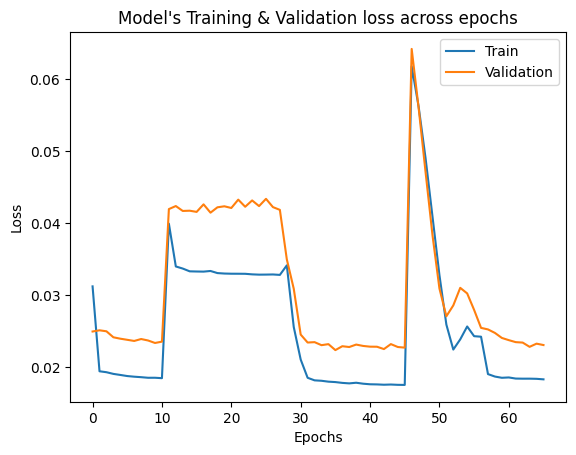

In [48]:

result = regressorGRU.evaluate(X_test,Y_test)
plotloss(history)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 100ms/step


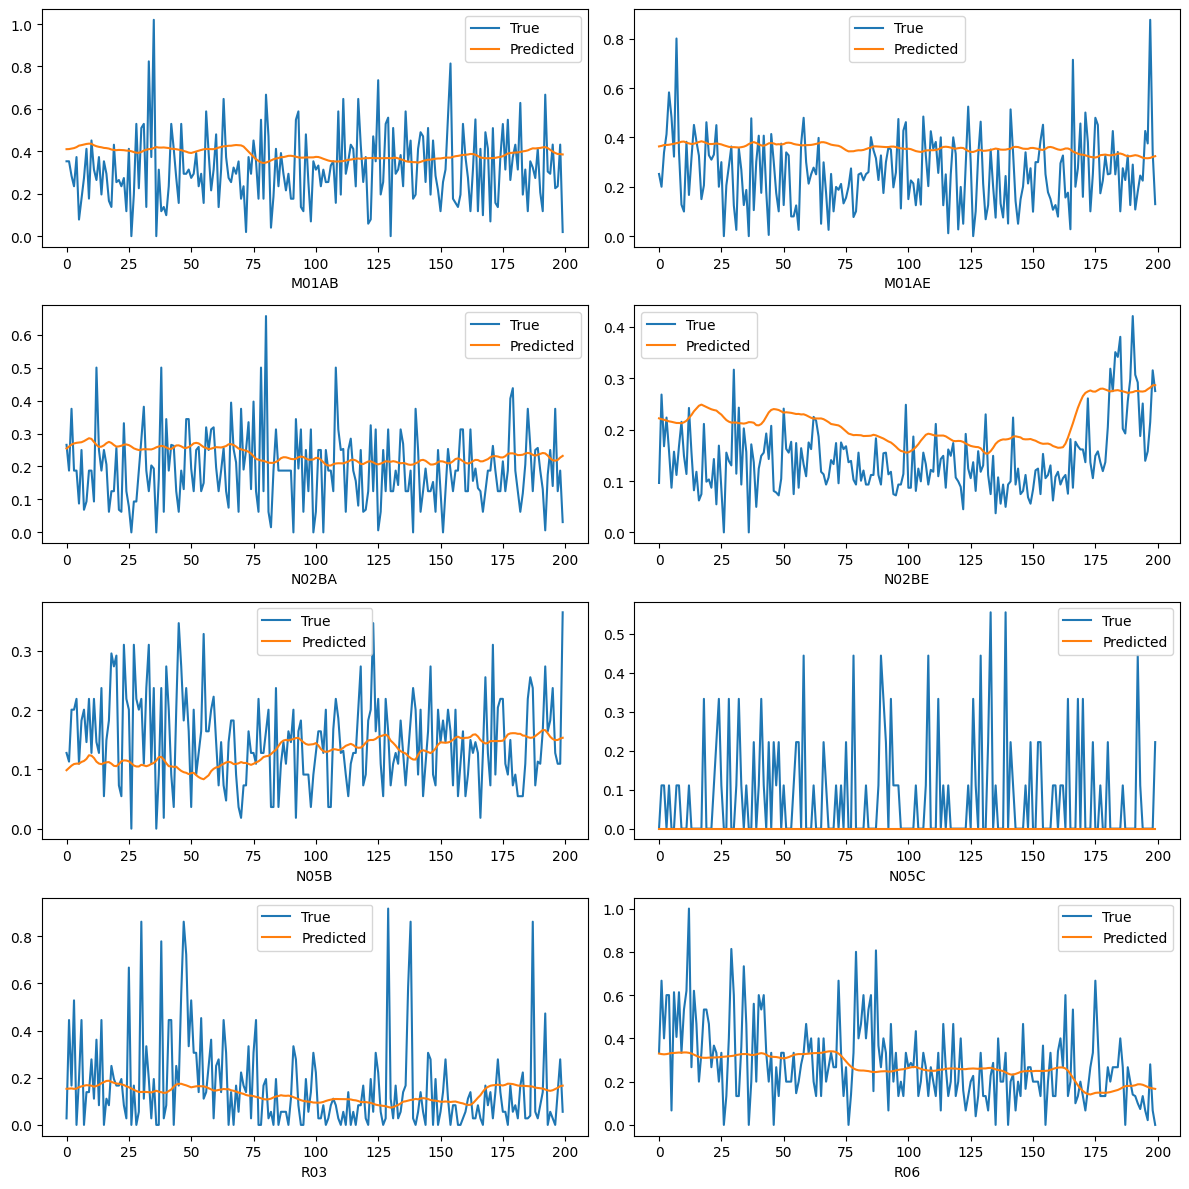

Model  mean abs        R2  \
0  SimpleRNN 4 units 50, SGD 0.001, LOSS mean_squ...  0.102468 -0.035813   
1  LSTM 2 units 50, Dense 2 25,1,  Adam 0.001, LO...  0.138927 -0.815100   
2  LSTM 32, 16, ,  Adam 0.001, LOSS mean_squared_...  0.099693 -0.005375   
3  4 LSTM 50, Drop 0.2,  Adam 0.001, LOSS mean_sq...  0.183893 -2.375937   
4  GRU L 4 units 50, Adam 0.001, LOSS mean_square...  0.109524 -0.272504   

   mean sqrd  
0   0.020455  
1   0.038807  
2   0.019757  
3   0.056685  
4   0.022745

In [49]:

print_result(regressorGRU, 'GRU L 4 units 50, Adam 0.001, LOSS mean_squared_error', X_test, Y_test)

In [50]:
# optimizer=tf.optimizers.Adamax(learning_rate=0.001),
# metrics=[tf.metrics.RootMeanSquaredError()]

# Result

In [51]:
results

Model  mean abs        R2  \
0  SimpleRNN 4 units 50, SGD 0.001, LOSS mean_squ...  0.102468 -0.035813   
1  LSTM 2 units 50, Dense 2 25,1,  Adam 0.001, LO...  0.138927 -0.815100   
2  LSTM 32, 16, ,  Adam 0.001, LOSS mean_squared_...  0.099693 -0.005375   
3  4 LSTM 50, Drop 0.2,  Adam 0.001, LOSS mean_sq...  0.183893 -2.375937   
4  GRU L 4 units 50, Adam 0.001, LOSS mean_square...  0.109524 -0.272504   

   mean sqrd  
0   0.020455  
1   0.038807  
2   0.019757  
3   0.056685  
4   0.022745

# drugi nacin

In [52]:
def str_to_datetime(s):
  split = s.split('-')
  year, month, day = int(split[0]), int(split[1]), int(split[2])
  return datetime.datetime(year=year, month=month, day=day)


datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [53]:
data2 = data.copy()
data2 = data2.drop(columns=['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03'])
data2

R06  Year  Month  Weekday Name  Day  Season_Fall  Season_Spring  \
datum                                                                          
2014-01-02  2.00  2014      1             3    2        False          False   
2014-01-03  4.00  2014      1             4    3        False          False   
2014-01-04  1.00  2014      1             5    4        False          False   
2014-01-05  0.00  2014      1             6    5        False          False   
2014-01-06  2.00  2014      1             0    6        False          False   
...          ...   ...    ...           ...  ...          ...            ...   
2019-10-04  1.00  2019     10             4    4         True          False   
2019-10-05  0.33  2019     10             5    5         True          False   
2019-10-06  4.20  2019     10             6    6         True          False   
2019-10-07  1.00  2019     10             0    7         True          False   
2019-10-08  0.00  2019     10             1    8         True          False   

            Season_Summer  Season_Winter  
datum                                     
2014-01-02          False           True  
2014-01-03          False           True  
2014-01-04          False           True  
2014-01-05          False           True  
2014-01-06          False           True  
...                   ...            ...  
2019-10-04          False          False  
2019-10-05          False          False  
2019-10-06          False          False  
2019-10-07          False          False  
2019-10-08          False          False  

[2106 rows x 9 columns]

In [54]:
def df_to_windowed_df(dataframe, first_date_str, last_date_str, n=3):
  first_date = str_to_datetime(first_date_str)
  last_date  = str_to_datetime(last_date_str)

  target_date = first_date
  
  dates = []
  X, Y = [], []

  last_time = False
  while True:
    df_subset = dataframe.loc[:target_date].tail(n+1)
    
    if len(df_subset) != n+1:
      print(f'Error: Window of size {n} is too large for date {target_date}')
      return

    values = df_subset['R06'].to_numpy()
    x, y = values[:-1], values[-1]

    dates.append(target_date)
    X.append(x)
    Y.append(y)

    next_week = dataframe.loc[target_date:target_date+datetime.timedelta(days=7)]
    next_datetime_str = str(next_week.head(2).tail(1).index.values[0])
    next_date_str = next_datetime_str.split('T')[0]
    year_month_day = next_date_str.split('-')
    year, month, day = year_month_day
    next_date = datetime.datetime(day=int(day), month=int(month), year=int(year))
    
    if last_time:
      break
    
    target_date = next_date

    if target_date == last_date:
      last_time = True
    
  ret_df = pd.DataFrame({})
  ret_df['Target Date'] = dates
  
  X = np.array(X)
  for i in range(0, n):
    X[:, i]
    ret_df[f'Target-{n-i}'] = X[:, i]
  
  ret_df['Target'] = Y

  return ret_df

# Start day second time around: '2021-03-25'
windowed_df = df_to_windowed_df(data, 
                                '2014-01-05', 
                                '2019-10-05', 
                                n=3)

windowed_df

Target Date  Target-3  Target-2  Target-1  Target
0     2014-01-05       2.0       4.0       1.0    0.00
1     2014-01-06       4.0       1.0       0.0    2.00
2     2014-01-07       1.0       0.0       2.0    0.00
3     2014-01-08       0.0       2.0       0.0    0.00
4     2014-01-09       2.0       0.0       0.0    2.00
...          ...       ...       ...       ...     ...
2095  2019-10-01       3.0       2.1       2.0    1.50
2096  2019-10-02       2.1       2.0       1.5    1.10
2097  2019-10-03       2.0       1.5       1.1    2.00
2098  2019-10-04       1.5       1.1       2.0    1.00
2099  2019-10-05       1.1       2.0       1.0    0.33

[2100 rows x 5 columns]

In [55]:
def windowed_df_to_date_X_y(windowed_dataframe):
  df_as_np = windowed_dataframe.to_numpy()

  dates = df_as_np[:, 0]

  middle_matrix = df_as_np[:, 1:-1]
  X = middle_matrix.reshape((len(dates), middle_matrix.shape[1], 1))

  Y = df_as_np[:, -1]

  return dates, X.astype(np.float32), Y.astype(np.float32)

dates, X, y = windowed_df_to_date_X_y(windowed_df)

dates.shape, X.shape, y.shape

((2100,), (2100, 3, 1), (2100,))

In [56]:
q_80 = int(len(dates) * .8)
q_90 = int(len(dates) * .9)

dates_train, X_train_1, y_train_1 = dates[:q_80], X[:q_80], y[:q_80]
dates_val, X_val_1, y_val_1 = dates[q_80:q_90], X[q_80:q_90], y[q_80:q_90]
dates_test, X_test_1, y_test_1 = dates[q_90:], X[q_90:], y[q_90:]

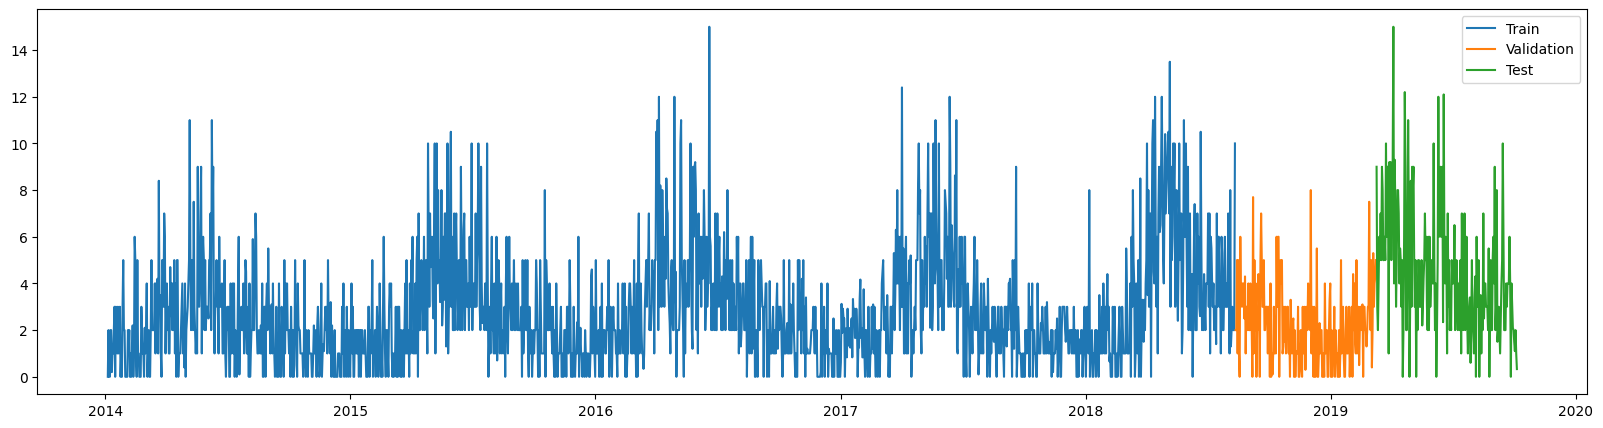

In [57]:
plt.figure(figsize=(20,5))
plt.plot(dates_train, y_train_1)
plt.plot(dates_val, y_val_1)
plt.plot(dates_test, y_test_1)

plt.legend(['Train', 'Validation', 'Test'])

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers

model = Sequential([layers.Input((3, 1)),
                    layers.LSTM(64),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(32, activation='relu'),
                    layers.Dense(1)])

model.compile(loss='mse', 
              optimizer=Adam(learning_rate=0.001),
              metrics=['mean_absolute_error'])

model.fit(X_train_1, y_train_1, validation_data=(X_val_1, y_val_1), epochs=50)


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 10.0159 - mean_absolute_error: 2.2997 - val_loss: 2.9065 - val_mean_absolute_error: 1.3247
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.3708 - mean_absolute_error: 1.5748 - val_loss: 3.1290 - val_mean_absolute_error: 1.3944
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.3907 - mean_absolute_error: 1.6135 - val_loss: 3.1733 - val_mean_absolute_error: 1.4027
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.3993 - mean_absolute_error: 1.5772 - val_loss: 3.0523 - val_mean_absolute_error: 1.3725
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.9504 - mean_absolute_error: 1.6658 - val_loss: 3.0212 - val_mean_absolute_error: 1.3651
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 4.7333 - mean_absolute_error: 1.6641 - val_loss: 2.9245 - val_mean_absolute_error: 1.3374
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.8512 - mean_absolute_error: 1.6937 - val_loss: 2.9

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


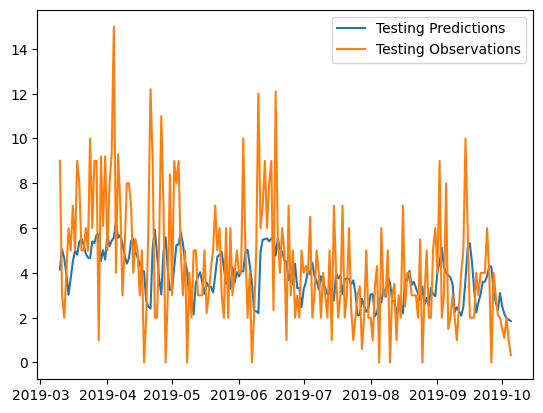

In [62]:

test_predictions = model.predict(X_test_1).flatten()

plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test_1)
plt.legend(['Testing Predictions', 'Testing Observations'])

In [58]:

regressorLSTM = tf.keras.Sequential()
regressorLSTM.add(LSTM(32, return_sequences = True,  input_shape = (X_train_1.shape[1],X_train_1.shape[2])))
regressorLSTM.add(LSTM(16, return_sequences = False))

regressorLSTM.add(Dense(1,activation="relu"))
regressorLSTM.compile(optimizer = Adam(learning_rate=0.001),loss = 'mean_squared_error',metrics = ["mean_absolute_error",'mean_squared_error'])
regressorLSTM.fit(X_train_1,y_train_1, validation_data=(X_val_1, y_val_1),epochs=200,batch_size=64, callbacks=[history, early_stopping])
regressorLSTM.summary()


Epoch 1/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 13.1424 - mean_absolute_error: 2.7626 - mean_squared_error: 13.1540 - val_loss: 8.8417 - val_mean_absolute_error: 2.2290 - val_mean_squared_error: 7.9104
Epoch 2/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.7622 - mean_absolute_error: 2.7293 - mean_squared_error: 12.7716 - val_loss: 8.8417 - val_mean_absolute_error: 2.2290 - val_mean_squared_error: 7.9104
Epoch 3/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.9002 - mean_absolute_error: 2.8493 - mean_squared_error: 13.9075 - val_loss: 8.8417 - val_mean_absolute_error: 2.2290 - val_mean_squared_error: 7.9104
Epoch 4/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.1092 - mean_absolute_error: 2.7372 - mean_squared_error: 13.1051 - val_loss: 8.8417 - val_mean_absolute_error: 2.2290 - val_mean_squared_error: 7.9104
Epoch 5/200
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 12.5753 - mean_absolute_error: 2.7148 - mean_squared_error: 12.5703 - val_loss: 8.8417 -

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 3, 32)          │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 16)             │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,517 (87.96 KB)

 Trainable params: 7,505 (29.32 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,012 (58.64 KB)

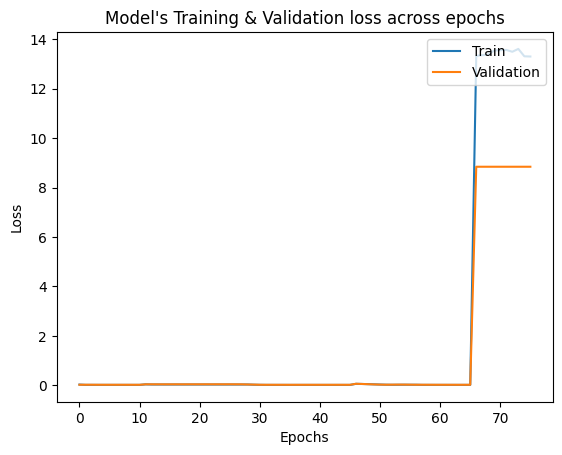

In [59]:
plotloss(history)

In [60]:
test_predictions = model.predict(X_test_1).flatten()

plt.figure(figsize = (10,5))
plt.plot(dates_test, test_predictions)
plt.plot(dates_test, y_test_1)
plt.legend(['Testing Predictions', 'Testing Observations'])

InvalidArgumentError: Graph execution error:

Detected at node sequential_1/simple_rnn_1/while/body/_1/sequential_1/simple_rnn_1/while/simple_rnn_cell_1/add defined at (most recent call last):
<stack traces unavailable>
Matrix size-incompatible: In[0]: [32,1], In[1]: [16,50]
	 [[{{node sequential_1/simple_rnn_1/while/body/_1/sequential_1/simple_rnn_1/while/simple_rnn_cell_1/add}}]] [Op:__inference_one_step_on_data_distributed_146295]